----- 

# **Table of Contents:**

* [Setup And Initialization](#setup-and-initialization)
  * [x](#part)
* [Python Web Scrapers](#python-web-scrapers) 
  * [HLTV Matches URL Scraper](#hltv-matches-url-scraper)
  * [HLTV Team Rankings Scraper](#hltv-team-rankings-scraper)
  * [HLTV Matches Stats Scraper](#hltv-matches-stats-scraper)


-----
-----
-----
# **Pre-Work And Setup Code**


-----
## Import All Python Modules

In [23]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns
sns.set() 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR

from datetime import datetime, timedelta
import random
plt.rcParams['axes.facecolor'] = 'white'



-----
-----
-----

# **EDA and Data Preparation**

-----

## Load the Matches Stats CSV

In [24]:
matches_df = pd.read_csv("https://raw.githubusercontent.com/a-dubs/ds3000-project/master/all_matches_stats.csv")
matches_df.head()

C:\Users\alecw\AppData\Local\Temp\ipykernel_11228\4013368181.py:1: DtypeWarning: Columns (20,31,42,53,64,84,95,106,117,128) have mixed types. Specify dtype option on import or set low_memory=False.
  matches_df = pd.read_csv("https://raw.githubusercontent.com/a-dubs/ds3000-project/master/all_matches_stats.csv")


,match_url,match_date,map,t1_name,t1_id,t1_total_rw,t1_fh_rw,t1_sh_rw,t1_ot_rw,t1_rating,...,t2p5_kills,t2p5_hskills,t2p5_assists,t2p5_fassists,t2p5_deaths,t2p5_kdratio,t2p5_kddiff,t2p5_adr,t2p5_fkdiff,t2p5_rating
0,/stats/matches/mapstatsid/46584/hellraisers-vs...,2017-05-17,train,hellraisers,5310,16,13,3,0,1.66,...,5.0,2.0,1.0,0.0,17.0,33.3%,-12.0,35.9,-3.0,0.26
1,/stats/matches/mapstatsid/62534/envy-vs-north,2018-03-08,cobblestone,north,7533,16,8,8,0,1.02,...,15.0,9.0,1.0,0.0,22.0,63.3%,-7.0,58.5,-3.0,0.78
2,/stats/matches/mapstatsid/61361/fnatic-vs-gambit,2018-02-17,inferno,fnatic,4991,16,10,6,0,1.28,...,7.0,5.0,3.0,1.0,22.0,45.8%,-15.0,49.2,-3.0,0.37
3,/stats/matches/mapstatsid/57159/liquid-vs-cloud9,2017-11-12,overpass,liquid,5973,5,3,2,0,0.89,...,16.0,5.0,3.0,0.0,16.0,71.4%,0.0,67.6,0.0,1.00
4,/stats/matches/mapstatsid/123194/dbl-poney-vs-ago,2021-07-04,ancient,dbl-poney,11003,16,6,10,0,1.04,...,15.0,10.0,2.0,0.0,22.0,56.7%,-7.0,64.6,-1.0,0.81


-----

## Load the Team Rankings CSV

In [25]:
rankings_df = pd.read_csv("https://raw.githubusercontent.com/a-dubs/ds3000-project/master/team_rankings.csv")
rankings_df.head()

,date,url,1_team_name,1_team_id,1_team_ranking_points,2_team_name,2_team_id,2_team_ranking_points,3_team_name,3_team_id,...,27_team_ranking_points,28_team_name,28_team_id,28_team_ranking_points,29_team_name,29_team_id,29_team_ranking_points,30_team_name,30_team_id,30_team_ranking_points
0,2022-03-07,https://www.hltv.org/ranking/teams/2022/march/07,natus-vincere,4608,1000,gambit,6651,744,g2,5995,...,56,endpoint,7234,55,spirit,7020,51,eternal-fire,11251,50
1,2022-03-08,https://www.hltv.org/ranking/teams/2022/march/07,natus-vincere,4608,1000,gambit,6651,744,g2,5995,...,56,endpoint,7234,55,spirit,7020,51,eternal-fire,11251,50
2,2022-03-09,https://www.hltv.org/ranking/teams/2022/march/07,natus-vincere,4608,1000,gambit,6651,744,g2,5995,...,56,endpoint,7234,55,spirit,7020,51,eternal-fire,11251,50
3,2022-03-10,https://www.hltv.org/ranking/teams/2022/march/07,natus-vincere,4608,1000,gambit,6651,744,g2,5995,...,56,endpoint,7234,55,spirit,7020,51,eternal-fire,11251,50
4,2022-02-28,https://www.hltv.org/ranking/teams/2022/februa...,natus-vincere,4608,1000,gambit,6651,744,g2,5995,...,56,apeks,9806,50,skade,10386,49,bluejays,5347,48


-----

## Converting and Cleaning Raw Scraped Data to Usable Dataset

In [26]:

# now lets add ranking team ranking information to the matches dataset #
# extract the two team name columns
t1_names = matches_df["t1_name"]
t2_names = matches_df["t2_name"]

t1_rankings = []
t2_rankings = []
# with alive_bar(len(matches_df), force_tty=True):
for i in range(len(matches_df)):
    date = matches_df["match_date"].iloc[i]
    rankings_series = rankings_df.loc[rankings_df["date"] == date, :].squeeze()
    t1_rank = int(x.index[0].split("_")[0]) if (x:=rankings_series[rankings_series == t1_names[i]]).size == 1 else 0
    t2_rank = int(x.index[0].split("_")[0]) if (x:=rankings_series[rankings_series == t2_names[i]]).size == 1 else 0
    t1_rankings.append(t1_rank)
    t2_rankings.append(t2_rank)
        
t1_rankings = pd.Series(t1_rankings).replace(0, np.nan)
t2_rankings = pd.Series(t2_rankings).replace(0, np.nan)

matches_dataset = matches_df.copy()

winners = []
for index, row in matches_dataset.iterrows():
    winners.append("t1" if row['t1_total_rw'] > row['t2_total_rw'] else "t2")

map_col_index = matches_dataset.columns.get_loc("map")
matches_dataset.insert(map_col_index, "winner", winners, allow_duplicates=False)

round_win_diffs = []
for index, row in matches_dataset.iterrows():
    round_win_diffs.append(row['t1_total_rw'] - row['t2_total_rw'])

winner_col_index = matches_dataset.columns.get_loc("winner")
matches_dataset.insert(winner_col_index + 1, "rw_diff", round_win_diffs, allow_duplicates=False)

t1_rank_col_index = matches_dataset.columns.get_loc("t1_id") 
matches_dataset.insert(t1_rank_col_index + 1, "t1_rank", t1_rankings, allow_duplicates=False)
# get updated index now that column has been inserted prior
t2_rank_col_index = matches_dataset.columns.get_loc("t2_id") 
matches_dataset.insert(t2_rank_col_index + 1, "t2_rank", t2_rankings, allow_duplicates=False)

# unranked teams will be given rank of 31 (one lower than the lowest rank possible)
matches_dataset["t1_rank"].fillna(31, inplace=True)
matches_dataset["t2_rank"].fillna(31, inplace=True)
# replace stray '-' with NaN
matches_dataset.replace("-",None, inplace=True)

# convert kdratio variables to decimal and make sure rating and adr columns are floats
for tn in (1,2):
    matches_dataset[f"t{tn}_rating"] = matches_dataset[f"t{tn}_rating"].astype("float32")
    for pn in (1,2,3,4,5):
        matches_dataset[f"t{tn}p{pn}_kdratio"].fillna("50%",inplace=True)
        try:
            matches_dataset[f"t{tn}p{pn}_kdratio"] = matches_dataset[f"t{tn}p{pn}_kdratio"].apply(
                lambda x: 0.01*float(x.replace("%","")) if x else None)
        except:
            print(":(")
            
        matches_dataset[f"t{tn}p{pn}_adr"] = matches_dataset[f"t{tn}p{pn}_adr"].astype("float32")
        matches_dataset[f"t{tn}p{pn}_rating"] = matches_dataset[f"t{tn}p{pn}_rating"].astype("float32")
datatypes = list(matches_dataset.dtypes)
columns = list(matches_dataset.columns)
# print({columns[i]:datatypes[i] for i in range(len(columns))})

# force team names to be lowercase
matches_dataset["t1_name"] = matches_dataset["t1_name"].str.lower()
matches_dataset["t2_name"] = matches_dataset["t2_name"].str.lower()

# apply categorical data type 
matches_dataset["map"] = matches_dataset["map"].astype("category") 
matches_dataset["t1_name"] = matches_dataset["t1_name"].astype("category")
matches_dataset["t2_name"] = matches_dataset["t2_name"].astype("category")  

matches_dataset.to_csv(index=False, path_or_buf="all_matches_dataset.csv")


-----

## Loading the Newly Prepared and Cleaned Dataset

In [27]:
matches_dataset = pd.read_csv("all_matches_dataset.csv")

PLAYER_STAT_VARIABLES = [var.replace("t1p1_","") for var in list(matches_dataset.columns) if ("t1p1_" in var) and (not "player" in var)]
print("All player stats variables:", ", ".join(PLAYER_STAT_VARIABLES))

many_pstat_vars = ["kills", "assists", "deaths", "kdratio", "kddiff", "adr", "fkdiff", "rating"]
few_pstat_vars = ["kills", "kdratio", "kddiff", "fkdiff", "rating"]
min_pstat_vars = ["kills", "kdratio", "rating"]

SELECTED_PSTAT_VARS = min_pstat_vars
print("SELECTED player stats variables:", ", ".join(SELECTED_PSTAT_VARS))

matches_dataset

All player stats variables: kills, hskills, assists, fassists, deaths, kdratio, kddiff, adr, fkdiff, rating
SELECTED player stats variables: kills, kdratio, rating


,match_url,match_date,winner,rw_diff,map,t1_name,t1_id,t1_rank,t1_total_rw,t1_fh_rw,...,t2p5_kills,t2p5_hskills,t2p5_assists,t2p5_fassists,t2p5_deaths,t2p5_kdratio,t2p5_kddiff,t2p5_adr,t2p5_fkdiff,t2p5_rating
0,/stats/matches/mapstatsid/46584/hellraisers-vs...,2017-05-17,t1,14,train,hellraisers,5310,8.0,16,13,...,5.0,2.0,1.0,0.0,17.0,0.333,-12.0,35.9,-3.0,0.26
1,/stats/matches/mapstatsid/62534/envy-vs-north,2018-03-08,t1,2,cobblestone,north,7533,13.0,16,8,...,15.0,9.0,1.0,0.0,22.0,0.633,-7.0,58.5,-3.0,0.78
2,/stats/matches/mapstatsid/61361/fnatic-vs-gambit,2018-02-17,t1,8,inferno,fnatic,4991,5.0,16,10,...,7.0,5.0,3.0,1.0,22.0,0.458,-15.0,49.2,-3.0,0.37
3,/stats/matches/mapstatsid/57159/liquid-vs-cloud9,2017-11-12,t2,-11,overpass,liquid,5973,8.0,5,3,...,16.0,5.0,3.0,0.0,16.0,0.714,0.0,67.6,0.0,1.00
4,/stats/matches/mapstatsid/123194/dbl-poney-vs-ago,2021-07-04,t1,2,ancient,dbl-poney,11003,25.0,16,6,...,15.0,10.0,2.0,0.0,22.0,0.567,-7.0,64.6,-1.0,0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62985,/stats/matches/mapstatsid/128100/hreds-vs-aab,2021-10-05,t2,-7,overpass,hreds,10116,31.0,9,7,...,13.0,9.0,1.0,0.0,19.0,0.560,-6.0,62.5,2.0,0.80
62986,/stats/matches/mapstatsid/96383/exploit-vs-offset,2019-12-08,t1,8,dust2,exploit,10192,31.0,16,8,...,7.0,4.0,4.0,0.0,22.0,0.542,-15.0,39.5,-4.0,0.51
62987,/stats/matches/mapstatsid/106567/syman-vs-tiki...,2020-08-01,t2,-8,mirage,syman,8772,31.0,8,1,...,10.0,5.0,4.0,2.0,15.0,0.708,-5.0,46.1,-2.0,0.82
62988,/stats/matches/mapstatsid/72336/nordavind-vs-3...,2018-08-22,t1,4,inferno,3dmax,4914,31.0,16,7,...,14.0,9.0,5.0,1.0,24.0,0.571,-10.0,59.4,1.0,0.69


-----

## Helper Functions

In [28]:
#######################################################################################################################
def filter_dataset_by_date(full_df, start_dt : datetime, stop_dt : datetime, date_col_name : str = "match_date"):
    df : DataFrame = full_df.copy()
    keep_dict = {}
    if start_dt > stop_dt:
        print("datetimes were given backwards")
        temp_dt = start_dt
        start_dt = stop_dt
        stop_dt = temp_dt
    for index, row in df.iterrows():
        if not((dt:=datetime.strptime(row[date_col_name], '%Y-%m-%d')) < start_dt or dt >= stop_dt):
            # keep_indeces.append(index)
            # keep_rows.append(row)
            keep_dict[index] = row 
    return DataFrame.from_dict(keep_dict,orient="index")

#######################################################################################################################
def partition_dataset_by_date(df : DataFrame, stop_date = "2017-08-01", partition_length : int = 120, overlapping : bool = True, partition_shift : int = 30, pstat_vars_filter = None, dt_it_init_val = None) -> Series:
    partitions = {}
    stop_dt = datetime.strptime(stop_date, '%Y-%m-%d')
    dt_it = dt_it_init_val if dt_it_init_val else datetime.now()
    if not overlapping:
        partition_shift = partition_length
    print("Partitioning dataset temporally (by date):")
    while dt_it - timedelta(days=(partition_length)) > stop_dt:
        partition = filter_dataset_by_date(df, date_col_name= "match_date", start_dt=dt_it - timedelta(days = partition_length), stop_dt=dt_it)
        date_range = f"{datetime.strftime(dt_it - timedelta(days = partition_length),'%Y-%m-%d')} -> {datetime.strftime(dt_it,'%Y-%m-%d')}"
        partitions[date_range] = partition
        print(date_range,":",partition.shape[0],"items in partition")
        dt_it = dt_it - timedelta(days=partition_shift)
    return Series(partitions)

#######################################################################################################################
def get_aggregate_players_stats(df : DataFrame, pstat_vars = SELECTED_PSTAT_VARS):
    teams_pstats = {}

    for index, row in df.iterrows():
        for tn in (1,2):
            # score_diff = row["t1_total_rw"] - row["t2_total_rw"] if tn==1 else row["t2_total_rw"] - row["t1_total_rw"]
            tname = row[f"t{tn}_name"]
            
            for pn in (1,2,3,4,5):
                id = f"t{tn}p{pn}_"
                pname = row[id+"player"]
                if teams_pstats.get(tname) == None:
                    teams_pstats[tname] = {}
                if teams_pstats[tname].get(pname) == None:
                    teams_pstats[tname][pname] = []
                teams_pstats[tname][pname].append({var:row[id+var] for var in pstat_vars})
    return teams_pstats

#######################################################################################################################
def get_active_rosters(matches_df) -> dict[str, list[str]]:
    aggregate_pstats = get_aggregate_players_stats(matches_df)
    teams_active_players = {}
    for tname in aggregate_pstats:
        team = aggregate_pstats[tname]
        players_games_played = {}
        # players_games_played =  {player: for player in team}
        for pname in team:
            player = team[pname]
            players_games_played[pname] = len(list(player))
        active_players = list(pd.Series(players_games_played).sort_values(ascending=False).iloc[:5].index)
        teams_active_players[tname] = active_players
    return teams_active_players

#######################################################################################################################
def get_sorted_teams_rosters(df : DataFrame, rosters, mode = "mean"):
    aggregated_teams_pstats = get_aggregate_players_stats(df)
    sorted_rosters = {}
    for tname in rosters:
        team = aggregated_teams_pstats[tname]
        pn = 0
        pratings = {}
        for pname in rosters[tname]:
            pmatches = pd.DataFrame(team[pname])
            prating_stats = pmatches.loc[:,["rating"]].describe().squeeze()
            prating_agg_val = prating_stats[mode]
            pratings[pname] = prating_agg_val
        
        sorted_rosters[tname] = list(Series(pratings).sort_values(ascending=False).index)
    return sorted_rosters

#######################################################################################################################
def make_teams_profiles(df : DataFrame, pstat_vars = SELECTED_PSTAT_VARS, mode = "mean"):
    
    rosters = get_sorted_teams_rosters(df, rosters=get_active_rosters(df))

    aggregated_teams_pstats = get_aggregate_players_stats(df, pstat_vars=pstat_vars)

    teams_profiles = {}
    for tname in rosters:
        team = aggregated_teams_pstats[tname]
        team_flattened_pstats = {}
        pn = 0
        for pname in rosters[tname]:
            pn += 1
            pmatches = pd.DataFrame(team[pname])
            pmatches_stats = pmatches.describe()
            pstats : Series = pmatches_stats.loc[[mode], :].squeeze()
            for index, value in pstats.iteritems():
                team_flattened_pstats[f"p{pn}_{index}"] = value
        teams_profiles[tname] = Series(team_flattened_pstats).astype("float32")
    return teams_profiles

#######################################################################################################################
def remove_unused_pstats(df : DataFrame, keep_pstat_vars : list [str]) -> DataFrame:
    keep_cols = [var for var in list(df.columns) if not((x:=var.split("_")[-1]) in PLAYER_STAT_VARIABLES) or x in keep_pstat_vars] 
    return df.loc[:, keep_cols ]

#######################################################################################################################
def color(color_name: str):
    return mcolors.XKCD_COLORS[f'xkcd:{color_name}']



-----

## Partitioning and Final Prep of the Data 

In [29]:
matches_dataset = remove_unused_pstats(matches_dataset, SELECTED_PSTAT_VARS)
matches_dataset = matches_dataset.sort_values(by=["match_date"], ascending=False)

matches_dataset["t1_rank"].fillna(31, inplace=True)
matches_dataset["t2_rank"].fillna(31, inplace=True)

matches_dataset = matches_dataset.sort_index()

dataset_partitions = partition_dataset_by_date(matches_dataset, partition_length=180, overlapping=False, dt_it_init_val=datetime(year=2022,month=4,day=26,hour=12))
recent_matches_dataset = dataset_partitions.iloc[0]

matches_dataset

Partitioning dataset temporally (by date):
2021-10-28 -> 2022-04-26 : 5385 items in partition
2021-05-01 -> 2021-10-28 : 6906 items in partition
2020-11-02 -> 2021-05-01 : 5563 items in partition
2020-05-06 -> 2020-11-02 : 6222 items in partition
2019-11-08 -> 2020-05-06 : 5169 items in partition
2019-05-12 -> 2019-11-08 : 6264 items in partition
2018-11-13 -> 2019-05-12 : 5846 items in partition
2018-05-17 -> 2018-11-13 : 7351 items in partition
2017-11-18 -> 2018-05-17 : 6679 items in partition


,match_url,match_date,winner,rw_diff,map,t1_name,t1_id,t1_rank,t1_total_rw,t1_fh_rw,...,t2p3_kdratio,t2p3_rating,t2p4_player,t2p4_kills,t2p4_kdratio,t2p4_rating,t2p5_player,t2p5_kills,t2p5_kdratio,t2p5_rating
0,/stats/matches/mapstatsid/46584/hellraisers-vs...,2017-05-17,t1,14,train,hellraisers,5310,8.0,16,13,...,0.500,0.40,LEGIJA,5,0.333,0.35,keev,5.0,0.333,0.26
1,/stats/matches/mapstatsid/62534/envy-vs-north,2018-03-08,t1,2,cobblestone,north,7533,13.0,16,8,...,0.800,1.17,Happy,21,0.700,1.15,xms,15.0,0.633,0.78
2,/stats/matches/mapstatsid/61361/fnatic-vs-gambit,2018-02-17,t1,8,inferno,fnatic,4991,5.0,16,10,...,0.583,0.76,mou,12,0.542,0.75,Dosia,7.0,0.458,0.37
3,/stats/matches/mapstatsid/57159/liquid-vs-cloud9,2017-11-12,t2,-11,overpass,liquid,5973,8.0,5,3,...,0.857,1.39,Skadoodle,10,0.810,1.10,RUSH,16.0,0.714,1.00
4,/stats/matches/mapstatsid/123194/dbl-poney-vs-ago,2021-07-04,t1,2,ancient,dbl-poney,11003,25.0,16,6,...,0.800,1.09,reatz,17,0.700,0.89,rallen,15.0,0.567,0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62985,/stats/matches/mapstatsid/128100/hreds-vs-aab,2021-10-05,t2,-7,overpass,hreds,10116,31.0,9,7,...,0.640,0.93,Buzz,12,0.640,0.80,jarko,13.0,0.560,0.80
62986,/stats/matches/mapstatsid/96383/exploit-vs-offset,2019-12-08,t1,8,dust2,exploit,10192,31.0,16,8,...,0.500,0.78,pr,11,0.667,0.72,obj,7.0,0.542,0.51
62987,/stats/matches/mapstatsid/106567/syman-vs-tiki...,2020-08-01,t2,-8,mirage,syman,8772,31.0,8,1,...,0.667,1.32,shushan,17,0.792,1.20,Djury,10.0,0.708,0.82
62988,/stats/matches/mapstatsid/72336/nordavind-vs-3...,2018-08-22,t1,4,inferno,3dmax,4914,31.0,16,7,...,0.571,0.81,ztk,17,0.536,0.79,becker,14.0,0.571,0.69


<br>
<br>
<br>
<br>
<br>

-----
-----
-----

# **EDA Visualizations**

-----
## Visualizing Portion of Games That Resulted in an Upset

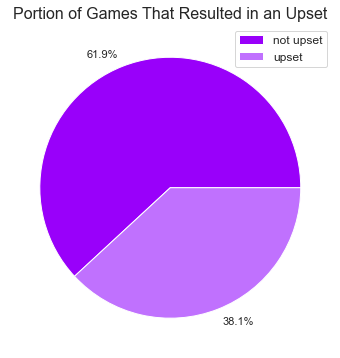

In [30]:
# upsets 
upsets_df = matches_dataset.copy()
upsets_df = upsets_df.loc[(upsets_df["t1_rank"] != upsets_df["t2_rank"]),:]

# print(upsets_df.loc[:,["t1_rank", "t2_rank", "rw_diff", "t1_total_rw", "t2_total_rw"]].head(10))
# higher_rank_team = []

# for index, row in eda_df.iterrows():
#     rank_diff = row["t1_rank"] - ["t2_rank"]
#     rw_diff = row["t1_rw_diff"] - ["t2_rw_diff"]

# eda_df["winner"].value_counts().plot.pie()


# eda_df.loc[:, ["winner", "rw_diff"]].value_counts("abs").plot()
# rank_diffs = []
# rw_diffs = []
# for index, row in eda_df.iterrows():
#     rank_diff = row["t1_rank"] - ["t2_rank"]
#     rw_diff = row["t1_rw_diff"] - ["t2_rw_diff"]

# pd.DataFrame()



# pie chart of # of games won by higher rank teams vs # of games won by lower rank team
upset_or_not = {}

for index, row in upsets_df.iterrows():
    upset_or_not[index] = "not upset" if (((row["t1_rank"] - row["t2_rank"]) * row["rw_diff"]) < 0) else "upset"
upset_or_not = Series(upset_or_not)
# print(upset_or_not.head(10))

upset_frequencies = upset_or_not.value_counts(normalize=True)
plt.figure(figsize=(6,6))
plt.pie(upset_frequencies, labels=[f"{round(x * 100, 1)}%" for x in upset_frequencies.values],  colors=[color("vivid purple"), color('easter purple')])
plt.legend(upset_frequencies.index,fontsize=12)
# plt.colormaps("cool")
plt.title("Portion of Games That Resulted in an Upset",fontsize=16)
# line graph of x var: abs(rank disparity), y var: % of games won by the higher rank team 
# grouped bar chart for aggregate player ratings of winning teams vs losing teams
plt.show()


-----
## Visualizing How Rank Disparity Affects Likelihood of Upsets

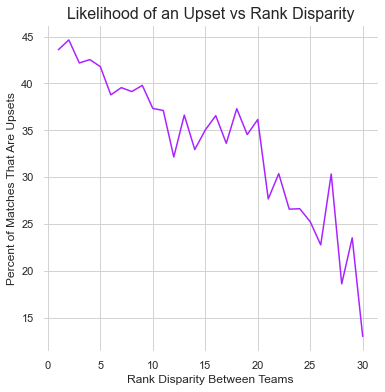

In [31]:
upsets_per_rank_diff = Series({n:0 for n in range(1,31)}, name="upsets_freq")
non_upsets_per_rank_diff = Series({n:0 for n in range(1,31)}, name="non_upsets_freq")
for index, row in upsets_df.iterrows():
    if upset_or_not[index] == "upset":
        upsets_per_rank_diff[abs(row["t1_rank"] - row["t2_rank"])] += 1
    else:
        non_upsets_per_rank_diff[abs(row["t1_rank"] - row["t2_rank"])] += 1


upsets_or_not_vs_rank_diffs = DataFrame(upsets_per_rank_diff)
upsets_or_not_vs_rank_diffs["non_upsets_freq"] = non_upsets_per_rank_diff

upsets_rel_freq_vs_rank_diffs = Series({n:0 for n in range(1,31)})
for index, row in upsets_or_not_vs_rank_diffs.iterrows():
    upsets_rel_freq_vs_rank_diffs[index] = round(row["upsets_freq"] / (row["upsets_freq"] + row["non_upsets_freq"]) * 100, 2)

plt.figure(figsize=(6,6))
plt.title("Likelihood of an Upset vs Rank Disparity",fontsize=16)
plt.ylabel("Percent of Matches That Are Upsets", fontsize=12)
plt.xlabel("Rank Disparity Between Teams", fontsize=12)
plt.plot(upsets_rel_freq_vs_rank_diffs.index, upsets_rel_freq_vs_rank_diffs.values, color=color("electric purple"))
plt.grid(c="lightgray")
plt.show()

<br>
<br>
<br>
<br>
<br>

-----
-----
-----

# **Match Winner Predictor Classification Models**




-----

## Converting Dataset for The Classification Models 

In [32]:
def convert_dataset_for_classification_models(df : DataFrame, seed : int = 1, test_set_size : float = 0.3):
    
    teams_profiles : dict[str,Series] = make_teams_profiles(df, pstat_vars=SELECTED_PSTAT_VARS)

    # convert all unranked teams to have rank of 31st position
    model_dataset = df.copy()
    model_dataset["t1_rank"].fillna(31, inplace=True)
    model_dataset["t2_rank"].fillna(31, inplace=True)

    # extract data for each team, extract player stats later
    teams_stats = model_dataset.loc[:,["t1_rank", "t2_rank", "t1_name", "t2_name"]]

    # add team player stat profiles to each entry / row of data in features dataframe
    features_dict = {}
    for index, row in teams_stats.iterrows():
        t1_name, t2_name = row["t1_name"], row["t2_name"]
        if t1_name in teams_profiles or t2_name in teams_profiles:
            if not t1_name in teams_profiles:
                t2_profile = Series(list(teams_profiles[t2_name].values), 
                    index = [f"t2{pstat_var}" for pstat_var in list(teams_profiles[t2_name].index)])
                t1_profile = Series(list(teams_profiles[t2_name].apply(lambda x: None).values), 
                    index = [f"t1{pstat_var}" for pstat_var in list(teams_profiles[t2_name].index)])
            elif not t2_name in teams_profiles:
                t1_profile = Series(list(teams_profiles[t1_name].values), 
                    index = [f"t1{pstat_var}" for pstat_var in list(teams_profiles[t1_name].index)])
                t2_profile = Series(list(teams_profiles[t1_name].apply(lambda x: None).values), 
                    index = [f"t2{pstat_var}" for pstat_var in list(teams_profiles[t1_name].index)])
            else:
                t1_profile = Series(list(teams_profiles[t1_name].values), 
                    index = [f"t1{pstat_var}" for pstat_var in list(teams_profiles[t1_name].index)])
                t2_profile = Series(list(teams_profiles[t2_name].values), 
                    index = [f"t2{pstat_var}" for pstat_var in list(teams_profiles[t2_name].index)])
            features_dict[index] = pd.concat([row, t1_profile, t2_profile])
            # keep_dict[index] = row
        # else:
            # model_dataset.drop(index, inplace=True)
    
    features = DataFrame.from_dict(features_dict, orient="index")
    features.drop(columns=["t1_name", "t2_name"], inplace=True)
    features.fillna(0,inplace=True)

    # numerical_vars = [var for var in list(features.columns) if var[0] == "t" and var[2] == "p"]
    numerical_vars = list(features.columns)
    
    labels = model_dataset["winner"].astype("category")
    # print(features.shape, labels.shape)
    xtrain, xtest, ytrain, ytest =  train_test_split( features, labels, random_state=seed, test_size=test_set_size)

    scaler = StandardScaler()
    scaler.fit(xtrain[numerical_vars])

    xtrain[numerical_vars] = scaler.transform(xtrain[numerical_vars]) #scale the training data
    xtest[numerical_vars] = scaler.transform(xtest[numerical_vars]) #scale the testing data

    return xtrain, xtest, ytrain, ytest


-----

## Initial Test of the Classification Models 

In [33]:
def initial_test_winner_models():
    xtrain, xtest, ytrain, ytest = convert_dataset_for_classification_models(recent_matches_dataset ,seed=69)

    basic_rank_pred = []
    for index, row in xtest.iterrows():
        basic_rank_pred.append("t1" if row["t1_rank"] >= row["t2_rank"] else "t2")
    print(f'The baseline predictor has a prediction accuracy of {round(accuracy_score(ytest,basic_rank_pred)*100,2)}%')

    random.seed(69)
    rand_pred = []
    for index, row in xtest.iterrows():
        rand_pred.append("t1" if random.random() < 0.5 else "t2")
    print(f'The random predictor has a prediction accuracy of {round(accuracy_score(ytest,rand_pred)*100,2)}%')

    ratio_rank_pred = []
    for index, row in xtest.iterrows():
        ratio_rank_pred.append("t1" if random.random() > float(row["t1_rank"]) / float(row["t1_rank"] + row["t2_rank"]) else "t2")
    print(f'The ratio rank predictor has a prediction accuracy of {round(accuracy_score(ytest,ratio_rank_pred)*100,2)}%')

    knn = KNeighborsClassifier(n_neighbors=15)
    knn.fit(xtrain,ytrain)
    print(f'The KNeighborsClassifier model has a prediction accuracy of {round(knn.score(xtest, ytest)*100,2)}%')

    dtc = DecisionTreeClassifier(random_state=69)
    dtc.fit(xtrain, ytrain)
    print(f'The DecisionTreeClassifier model has a prediction accuracy of {round(dtc.score(xtest, ytest)*100,2)}%')

    rf = RandomForestClassifier(criterion='entropy', n_estimators = 100, random_state = 69)
    rf.fit(xtrain, ytrain)
    print(f'The RandomForestClassifier model has a prediction accuracy of {round(rf.score(xtest, ytest)*100,2)}%')
    
    nb = GaussianNB()
    nb.fit(xtrain, ytrain)
    print(f'The GaussianNB model has a prediction accuracy of {round(nb.score(xtest, ytest)*100,2)}%')

    svm = SVC()
    svm.fit(xtrain, ytrain)
    print(f'The SVC model has a prediction accuracy of {round(svm.score(xtest, ytest)*100,2)}%')
    

initial_test_winner_models()

The baseline predictor has a prediction accuracy of 48.82%
The random predictor has a prediction accuracy of 50.74%
The ratio rank predictor has a prediction accuracy of 46.35%
The KNeighborsClassifier model has a prediction accuracy of 58.23%
The DecisionTreeClassifier model has a prediction accuracy of 57.92%
The RandomForestClassifier model has a prediction accuracy of 58.66%
The GaussianNB model has a prediction accuracy of 57.55%
The SVC model has a prediction accuracy of 60.77%


-----
## Get Available Hyper-Parameters of the Classifiers

In [34]:
############## UNCOMMENT BELOW TO VIEW ALL TUNABLE PARAMS FOR THE VARIOUS MODELS ###############
dummy_knn = KNeighborsClassifier()
print("Available params for knn():")
print(", ".join([f"{key}: {dummy_knn.get_params()[key]}" for key in dummy_knn.get_params()]))

dummy_dtc = DecisionTreeClassifier()
print("\nAvailable params for dtc():")
print(", ".join([f"{key}: {dummy_dtc.get_params()[key]}" for key in dummy_dtc.get_params()]))

dummy_rf = RandomForestClassifier()
print("\nAvailable params for rf():")
print(", ".join([f"{key}: {dummy_rf.get_params()[key]}" for key in dummy_rf.get_params()]))

dummy_nb = GaussianNB()
print("\nAvailable params for nb():")
print(", ".join([f"{key}: {dummy_nb.get_params()[key]}" for key in dummy_nb.get_params()]))

dummy_svm = SVC()
print("\nAvailable params for svc():")
print(", ".join([f"{key}: {dummy_svm.get_params()[key]}" for key in dummy_svm.get_params()]))

Available params for knn():
algorithm: auto, leaf_size: 30, metric: minkowski, metric_params: None, n_jobs: None, n_neighbors: 5, p: 2, weights: uniform

Available params for dtc():
ccp_alpha: 0.0, class_weight: None, criterion: gini, max_depth: None, max_features: None, max_leaf_nodes: None, min_impurity_decrease: 0.0, min_samples_leaf: 1, min_samples_split: 2, min_weight_fraction_leaf: 0.0, random_state: None, splitter: best

Available params for rf():
bootstrap: True, ccp_alpha: 0.0, class_weight: None, criterion: gini, max_depth: None, max_features: auto, max_leaf_nodes: None, max_samples: None, min_impurity_decrease: 0.0, min_samples_leaf: 1, min_samples_split: 2, min_weight_fraction_leaf: 0.0, n_estimators: 100, n_jobs: None, oob_score: False, random_state: None, verbose: 0, warm_start: False

Available params for nb():
priors: None, var_smoothing: 1e-09

Available params for svc():
C: 1.0, break_ties: False, cache_size: 200, class_weight: None, coef0: 0.0, decision_function_shap

-----
## Performing Hyper-Parameter Tuning

In [35]:
def tune_winner_models():

    knn_tuning_results = {}
    dtc_tuning_results =  {}
    rf_tuning_results = {}
    nb_tuning_results = {}
    svm_tuning_results = {}

    for daterange, part in dataset_partitions.iteritems():
        print(daterange)
      
        # generate some random states !
        random_states = [n + n**n for n in range(0,5)]
        

        xtrain, xtest, ytrain, ytest = convert_dataset_for_classification_models(df=part, seed=1)

        # xtrain, xtest, ytrain, ytest = convert_dataset_for_models(df=part, seed=seed)
        knn_params = {
            # "n_neighbors": np.arange(1, 100, 10),
            "n_neighbors": [1] + [n for n in range(10,101,10)],
            # "random_state" : random_states,
        }
        knn = KNeighborsClassifier()
        knn_grid = GridSearchCV(estimator = knn, param_grid = knn_params, cv=5, return_train_score = True, scoring='accuracy')
        knn_grid.fit(xtrain, ytrain)    
        knn_tuning_results[daterange] = dict(knn_grid.best_params_) 
        knn_tuning_results[daterange]["score"] = knn_grid.best_score_
        print("knn: ", ", ".join([f"{key} : {knn_grid.best_params_[key]}" for key in knn_grid.best_params_]))


        dtc_params = {
            # "n_neighbors": np.arange(1, 100, 10),
            "random_state" : random_states,
        }
        dtc = DecisionTreeClassifier()
        dtc_grid = GridSearchCV(estimator = dtc, param_grid = dtc_params, cv=5, return_train_score = True, scoring='accuracy')
        dtc_grid.fit(xtrain, ytrain)    
        dtc_tuning_results[daterange] = dict(dtc_grid.best_params_) 
        dtc_tuning_results[daterange]["score"] = dtc_grid.best_score_
        print("dtc: ", ", ".join([f"{key} : {dtc_grid.best_params_[key]}" for key in dtc_grid.best_params_]))

        rf_params = {
            "n_estimators": [1] + [n for n in range(10,201,20)],
            "random_state" : random_states,
        }

        rf = RandomForestClassifier()
        rf_grid = GridSearchCV(estimator = rf, param_grid = rf_params, cv=5, return_train_score = True, scoring='accuracy')
        rf_grid.fit(xtrain, ytrain)    
        rf_tuning_results[daterange] = dict(rf_grid.best_params_) 
        rf_tuning_results[daterange]["score"] = rf_grid.best_score_
        print("rf: ", ", ".join([f"{key} : {rf_grid.best_params_[key]}" for key in rf_grid.best_params_]))


        nb_params = {
            "var_smoothing": np.logspace(0,-9, num=10)
        }
        nb = GaussianNB()
        nb_grid = GridSearchCV(estimator = nb, param_grid = nb_params, cv=5, return_train_score = True, scoring='accuracy')
        nb_grid.fit(xtrain, ytrain)    
        nb_tuning_results[daterange] = dict(nb_grid.best_params_) 
        nb_tuning_results[daterange]["score"] = nb_grid.best_score_
        print("nb: ", ", ".join([f"{key} : {nb_grid.best_params_[key]}" for key in nb_grid.best_params_]))

        svm_params = {
            'C': np.arange(8, 12) * 0.1,
            'gamma': np.arange(1, 5) * 0.1,
        }
        svm = SVC()
        svm_grid = GridSearchCV(estimator = svm, param_grid = svm_params, cv=5, return_train_score = True, scoring='accuracy')
        svm_grid.fit(xtrain, ytrain)    
        svm_tuning_results[daterange] = dict(svm_grid.best_params_) 
        svm_tuning_results[daterange]["score"] = abs(svm_grid.best_score_)
        print("svm: ", ", ".join([f"{key} : {svm_grid.best_params_[key]}" for key in svm_grid.best_params_]))

        # store the results after each iteration!
        DataFrame.from_dict(knn_tuning_results, orient="index").to_pickle("cache_knn_tuning_results.pkl")
        DataFrame.from_dict(dtc_tuning_results, orient="index").to_pickle("cache_dtc_tuning_results.pkl")
        DataFrame.from_dict(rf_tuning_results, orient="index").to_pickle("cache_rf_tuning_results.pkl")
        DataFrame.from_dict(nb_tuning_results, orient="index").to_pickle("cache_nb_tuning_results.pkl")
        DataFrame.from_dict(svm_tuning_results, orient="index").to_pickle("cache_svm_tuning_results.pkl")

    return knn_tuning_results, dtc_tuning_results, rf_tuning_results, nb_tuning_results, svm_tuning_results
    
# todo: uncomment this!
# tune_winner_models()



-----

## Displaying Best Parameter Values From Hyper-Parameter Tuning

In [36]:
# test the classifier models after hyper-parameter tuning 
knn_tuning_results_df : DataFrame = pd.read_pickle("cache_knn_tuning_results.pkl")
dtc_tuning_results_df : DataFrame = pd.read_pickle("cache_dtc_tuning_results.pkl")
rf_tuning_results_df : DataFrame = pd.read_pickle("cache_rf_tuning_results.pkl")
nb_tuning_results_df : DataFrame = pd.read_pickle("cache_nb_tuning_results.pkl")
svm_tuning_results_df : DataFrame = pd.read_pickle("cache_svm_tuning_results.pkl")


print("="*100 + "\nKNN Tuning Results:")
print(knn_tuning_results_df.head(3))
print("="*100 + "\nDTC Tuning Results:")
print(dtc_tuning_results_df.head(3))
print("="*100 + "\nRF Tuning Results:")
print(rf_tuning_results_df.head(3))
print("="*100 + "\nNB Tuning Results:")
print(nb_tuning_results_df.head(3))
print("="*100 + "\nSVM Tuning Results:")
print(svm_tuning_results_df.head(3))

KNN Tuning Results:
                          n_neighbors     score
2021-10-28 -> 2022-04-26           60  0.611838
2021-05-01 -> 2021-10-28          100  0.633224
2020-11-02 -> 2021-05-01           70  0.625838
DTC Tuning Results:
                          random_state     score
2021-10-28 -> 2022-04-26             6  0.576273
2021-05-01 -> 2021-10-28            30  0.603023
2020-11-02 -> 2021-05-01             1  0.592962
RF Tuning Results:
                          n_estimators  random_state     score
2021-10-28 -> 2022-04-26           130           260  0.599095
2021-05-01 -> 2021-10-28           110             6  0.628053
2020-11-02 -> 2021-05-01            70           260  0.610678
NB Tuning Results:
                          var_smoothing     score
2021-10-28 -> 2022-04-26            1.0  0.595125
2021-05-01 -> 2021-10-28            1.0  0.615643
2020-11-02 -> 2021-05-01            1.0  0.600154
SVM Tuning Results:
                            C  gamma     score
2021-10-28 -> 2

-----

## Testing Performance of Classification Models After Hyper-Parameter Tuning 

In [37]:

models_best_results = pd.DataFrame(knn_tuning_results_df["score"].rename("knn_score"))
models_best_results["dtc_score"] = dtc_tuning_results_df["score"]
models_best_results["rf_score"] = rf_tuning_results_df["score"]
models_best_results["nb_score"] = nb_tuning_results_df["score"]
models_best_results["svm_score"] = svm_tuning_results_df["score"]
print(models_best_results,"\n\n")

models_best_results_stats = pd.DataFrame(knn_tuning_results_df["score"].rename("knn_score").describe())
models_best_results_stats["dtc_score"] = dtc_tuning_results_df["score"].describe()
models_best_results_stats["rf_score"] = rf_tuning_results_df["score"].describe()
models_best_results_stats["nb_score"] = nb_tuning_results_df["score"].describe()
models_best_results_stats["svm_score"] = svm_tuning_results_df["score"].describe()
print(models_best_results_stats)

def test_classifier_models_after_tuning() -> DataFrame:
    # initialize the Dataframe so we can fill it in
    results = DataFrame(
        columns=["basic_rank_pred", "rand_pred", "ratio_rank_pred", "knn", "dtc", "rf", "nb", "svm"],
        index=dataset_partitions.index)

    for part_daterange, part in dataset_partitions.iteritems():
        xtrain, xtest, ytrain, ytest = convert_dataset_for_classification_models(df=part, seed=1)

        basic_rank_pred = []
        for index, row in xtest.iterrows():
            basic_rank_pred.append("t1" if row["t1_rank"] >= row["t2_rank"] else "t2")
        results.loc[part_daterange]["basic_rank_pred"] = accuracy_score(ytest,basic_rank_pred)

        random.seed(69)
        rand_pred = []
        for index, row in xtest.iterrows():
            rand_pred.append("t1" if random.random() < 0.5 else "t2")
        results.loc[part_daterange]["rand_pred"] = accuracy_score(ytest,rand_pred)

        ratio_rank_pred = []
        for index, row in xtest.iterrows():
            ratio_rank_pred.append("t1" if random.random() > float(row["t1_rank"]) / float(row["t1_rank"] + row["t2_rank"]) else "t2")
        results.loc[part_daterange]["ratio_rank_pred"] = accuracy_score(ytest,ratio_rank_pred)

        knn = KNeighborsClassifier(n_neighbors=int(knn_tuning_results_df.iloc[0]["n_neighbors"]))
        knn.fit(xtrain,ytrain)
        results.loc[part_daterange]["knn"] = knn.score(xtest, ytest)

        dtc = DecisionTreeClassifier(random_state=int(dtc_tuning_results_df.iloc[0]["random_state"]))
        dtc.fit(xtrain, ytrain)
        results.loc[part_daterange]["dtc"] = dtc.score(xtest, ytest)

        rf = RandomForestClassifier(criterion='entropy', 
            n_estimators = int(rf_tuning_results_df.iloc[0]["n_estimators"]), 
            random_state = int(rf_tuning_results_df.iloc[0]["random_state"]))
        rf.fit(xtrain, ytrain)
        results.loc[part_daterange]["rf"] = rf.score(xtest, ytest)

        nb = GaussianNB(var_smoothing=nb_tuning_results_df.iloc[0]["var_smoothing"])
        nb.fit(xtrain, ytrain)
        results.loc[part_daterange]["nb"] = nb.score(xtest, ytest)

        svm = SVC(C=svm_tuning_results_df.iloc[0]["C"], gamma=svm_tuning_results_df.iloc[0]["gamma"])
        svm.fit(xtrain, ytrain)
        results.loc[part_daterange]["svm"] = svm.score(xtest, ytest)

        # print(results.loc[part_daterange])
    
    return results.astype("float64")

classification_models_results = test_classifier_models_after_tuning()
classification_models_results



                          knn_score  dtc_score  rf_score  nb_score  svm_score
2021-10-28 -> 2022-04-26   0.611838   0.576273  0.599095  0.595125   0.601218
2021-05-01 -> 2021-10-28   0.633224   0.603023  0.628053  0.615643   0.634878
2020-11-02 -> 2021-05-01   0.625838   0.592962  0.610678  0.600154   0.617102
2020-05-06 -> 2020-11-02   0.631688   0.597704  0.624340  0.635591   0.615155
2019-11-08 -> 2020-05-06   0.632123   0.566058  0.604201  0.603665   0.608352
2019-05-12 -> 2019-11-08   0.653286   0.604698  0.640968  0.609033   0.633894
2018-11-13 -> 2019-05-12   0.658846   0.618765  0.646617  0.648335   0.652489
2018-05-17 -> 2018-11-13   0.648008   0.609524  0.645287  0.634208   0.633042
2017-11-18 -> 2018-05-17   0.651551   0.614332  0.639572  0.641711   0.632086 


       knn_score  dtc_score  rf_score  nb_score  svm_score
count   9.000000   9.000000  9.000000  9.000000   9.000000
mean    0.638489   0.598149  0.626535  0.620385   0.625357
std     0.015327   0.017387  0.018178  0

,basic_rank_pred,rand_pred,ratio_rank_pred,knn,dtc,rf,nb,svm
2021-10-28 -> 2022-04-26,0.487624,0.501856,0.492574,0.591584,0.594678,0.604579,0.589109,0.592822
2021-05-01 -> 2021-10-28,0.517857,0.499035,0.484556,0.629826,0.623069,0.654440,0.602799,0.631274
2020-11-02 -> 2021-05-01,0.491312,0.482924,0.471540,0.638706,0.608149,0.623727,0.596165,0.629119
2020-05-06 -> 2020-11-02,0.500268,0.495447,0.486877,0.637922,0.608463,0.627745,0.633637,0.618104
2019-11-08 -> 2020-05-06,0.507415,0.506125,0.475177,0.633140,0.607995,0.618956,0.602837,0.617666
2019-05-12 -> 2019-11-08,0.487234,0.511170,0.481383,0.626596,0.619149,0.632447,0.610638,0.626596
2018-11-13 -> 2019-05-12,0.484036,0.496579,0.475485,0.639681,0.624857,0.649943,0.654504,0.640251
2018-05-17 -> 2018-11-13,0.504986,0.506346,0.490481,0.655032,0.623300,0.645059,0.638713,0.650045
2017-11-18 -> 2018-05-17,0.467565,0.493014,0.484032,0.635729,0.599800,0.626248,0.639721,0.638723


-----

## Visualization of Performance of Classification Models Per Partition of Data

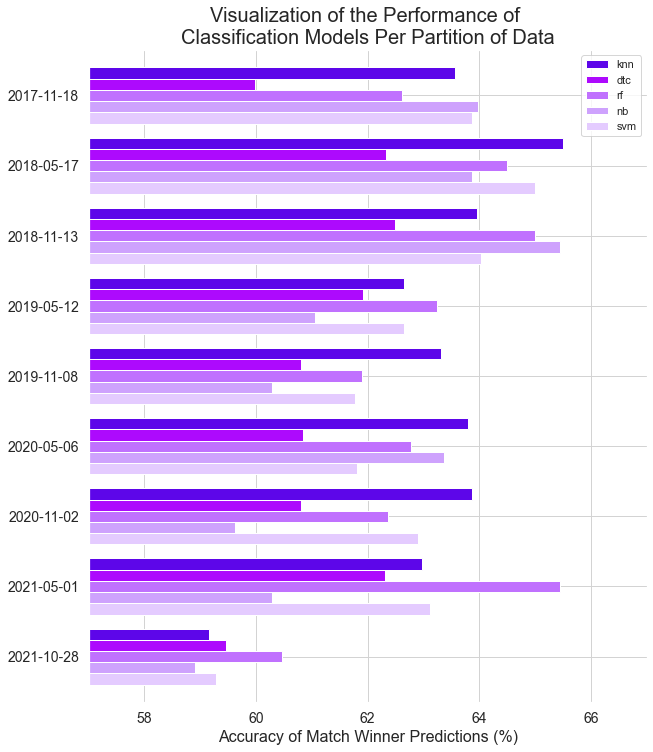

In [135]:

plt.rcParams['axes.facecolor'] = 'white'

temp_df = classification_models_results.copy().loc[:, "knn":].iloc[:, ::-1].apply(lambda x: x * 100)
temp_df.index = [label.split(" -> ")[0] for label in classification_models_results.index]

color_list1 = [color("blue violet"), color("bright violet"), color("easter purple"), color("lilac"), color("pale lilac")]
color_list2 = color_list1
color_list2.reverse()
temp_df.plot(kind="barh", figsize=(10,12), xlim=(57,67), width=.8, legend='reverse',color=color_list2, fontsize=14)

plt.title("Visualization of the Performance of \nClassification Models Per Partition of Data", fontsize=20)
plt.xlabel("Accuracy of Match Winner Predictions (%)", fontsize=16)
plt.grid(c="lightgray")
plt.show()

-----

## Comparison of Average Perfomance of Classification M.L. Models 

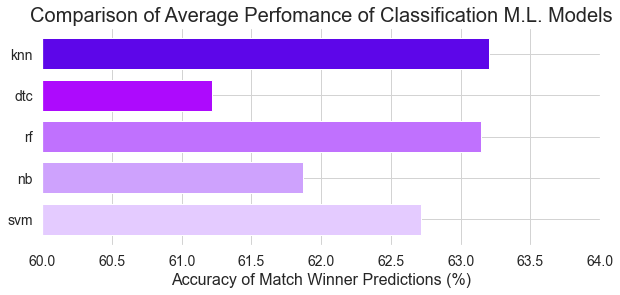

In [77]:
classification_models_results.loc[:,"knn":].iloc[:, ::-1].describe().loc["mean"].apply(lambda x: x * 100).plot(kind="barh", figsize=(10,4), xlim=(60,64), width=.75, color=color_list2, fontsize=14)
plt.title('Comparison of Average Perfomance of Classification M.L. Models',fontsize=20)
plt.grid(c="lightgray")
plt.xlabel("Accuracy of Match Winner Predictions (%)", fontsize=16)

plt.show()

-----

## Comparison of Average Perfomance of M.L. Models vs "Stupid" Algorithms 

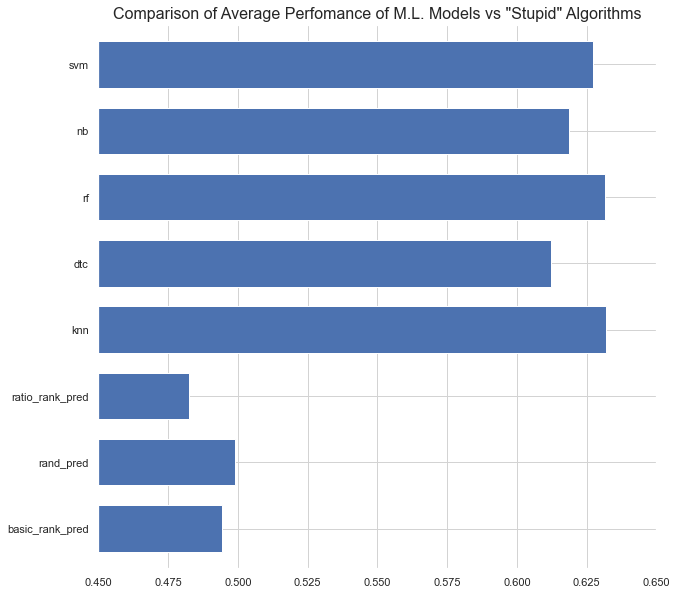

In [40]:

classification_models_results.describe().loc["mean"].plot(kind="barh", figsize=(10,10), xlim=(.45,.65), width=.7)
plt.title('Comparison of Average Perfomance of M.L. Models vs "Stupid" Algorithms',fontsize=16)
plt.grid(c="lightgray")

plt.show()


-----

## Prep For Classification Decision Tree Visualizations

In [86]:
xtrain, xtest, ytrain, ytest = convert_dataset_for_classification_models(df=recent_matches_dataset, seed=1)


dtc = DecisionTreeClassifier(random_state=int(dtc_tuning_results_df.iloc[0]["random_state"]))
dtc.fit(xtrain, ytrain)
print(f'The DecisionTreeClassifier model has a prediction accuracy of {round(dtc.score(xtest, ytest)*100,2)}%')

rf = RandomForestClassifier(criterion='entropy', 
    n_estimators = int(rf_tuning_results_df.iloc[0]["n_estimators"]), 
    random_state = int(rf_tuning_results_df.iloc[0]["random_state"]))
rf.fit(xtrain, ytrain)
print(f'The RandomForestClassifier model has a prediction accuracy of {round(rf.score(xtest, ytest)*100,2)}%')

The DecisionTreeClassifier model has a prediction accuracy of 59.47%
The RandomForestClassifier model has a prediction accuracy of 60.46%


-----

## Graph of Feature Importances of Decision Tree Classifier 

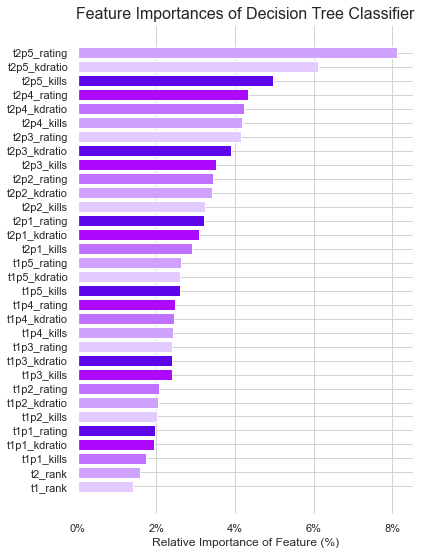

In [87]:
fig = plt.figure(figsize=(6,9))
dtc_sorted_feat = dtc.feature_importances_.argsort()
plt.barh(xtrain.columns,dtc.feature_importances_[dtc_sorted_feat],color=color_list1)
plt.title("Feature Importances of Decision Tree Classifier",fontsize=16)
plt.grid(c="lightgray")
plt.xlabel("Relative Importance of Feature (%)")
plt.xticks(ticks=[0.00, 0.02, 0.04, 0.06, 0.08],labels=["0%","2%", "4%", "6%", "8%"])

plt.show()

-----

## Graph of Feature Importances of Random Forest Classifier 

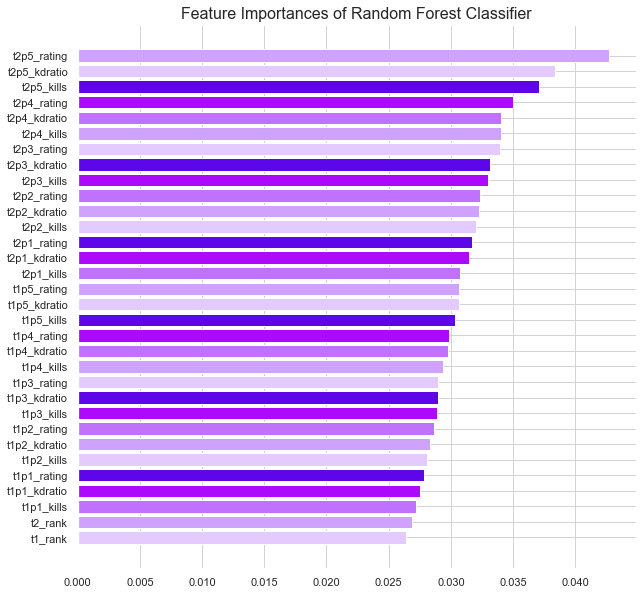

In [ ]:

fig = plt.figure(figsize=(10, 10))
rf_sorted_feat = rf.feature_importances_.argsort()
plt.barh(xtrain.columns,rf.feature_importances_[rf_sorted_feat], color=color_list1)
plt.title("Feature Importances of Random Forest Classifier",fontsize=16)
plt.grid(c="lightgray")

plt.show()

-----

## Visualization of a Decision Tree Classifier

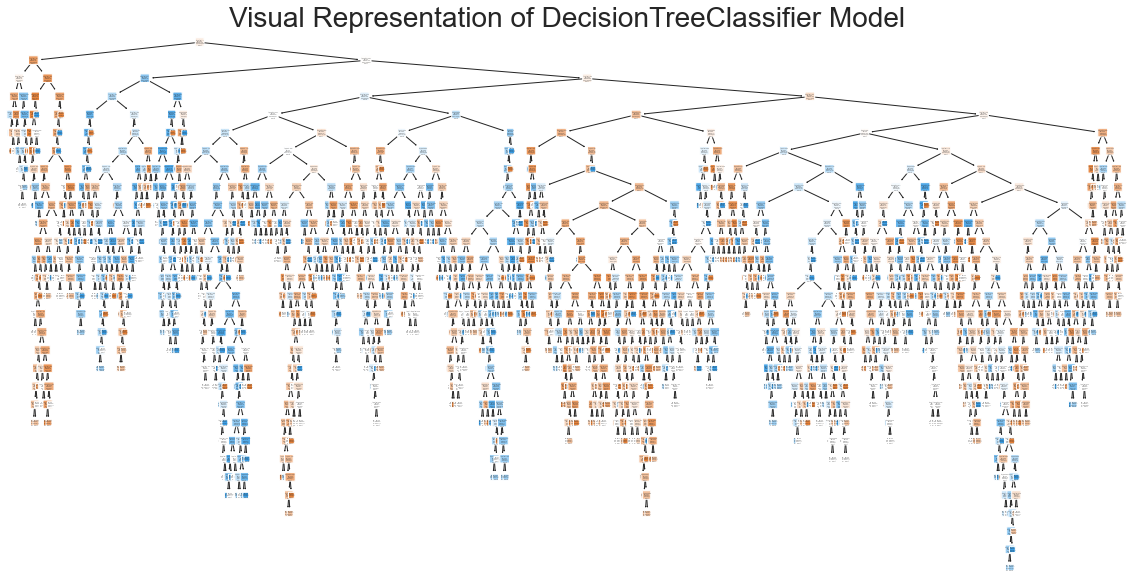

In [94]:
fig = plt.figure(figsize=(20, 10))

plot_tree(dtc, 
          feature_names=xtrain.columns,
          class_names=["t1", "t2"], 
          filled=True, impurity=True, #max_depth=5,
          rounded=True,)
plt.title("Visual Representation of DecisionTreeClassifier Model", fontsize=28)
plt.show()

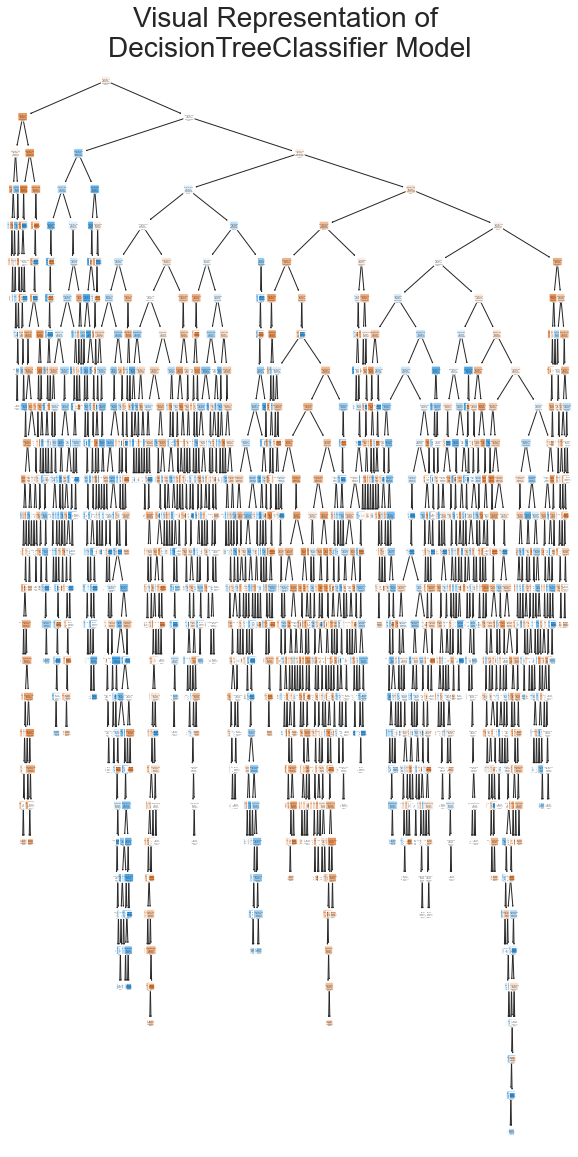

In [95]:
fig = plt.figure(figsize=(10, 20))

plot_tree(dtc, 
          feature_names=xtrain.columns,
          class_names=["t1", "t2"], 
          filled=True, impurity=True, #max_depth=5,
          rounded=True)
plt.title("Visual Representation of \nDecisionTreeClassifier Model", fontsize=28)
plt.show()

-----

## Visualization of a Random Forest Classifier 

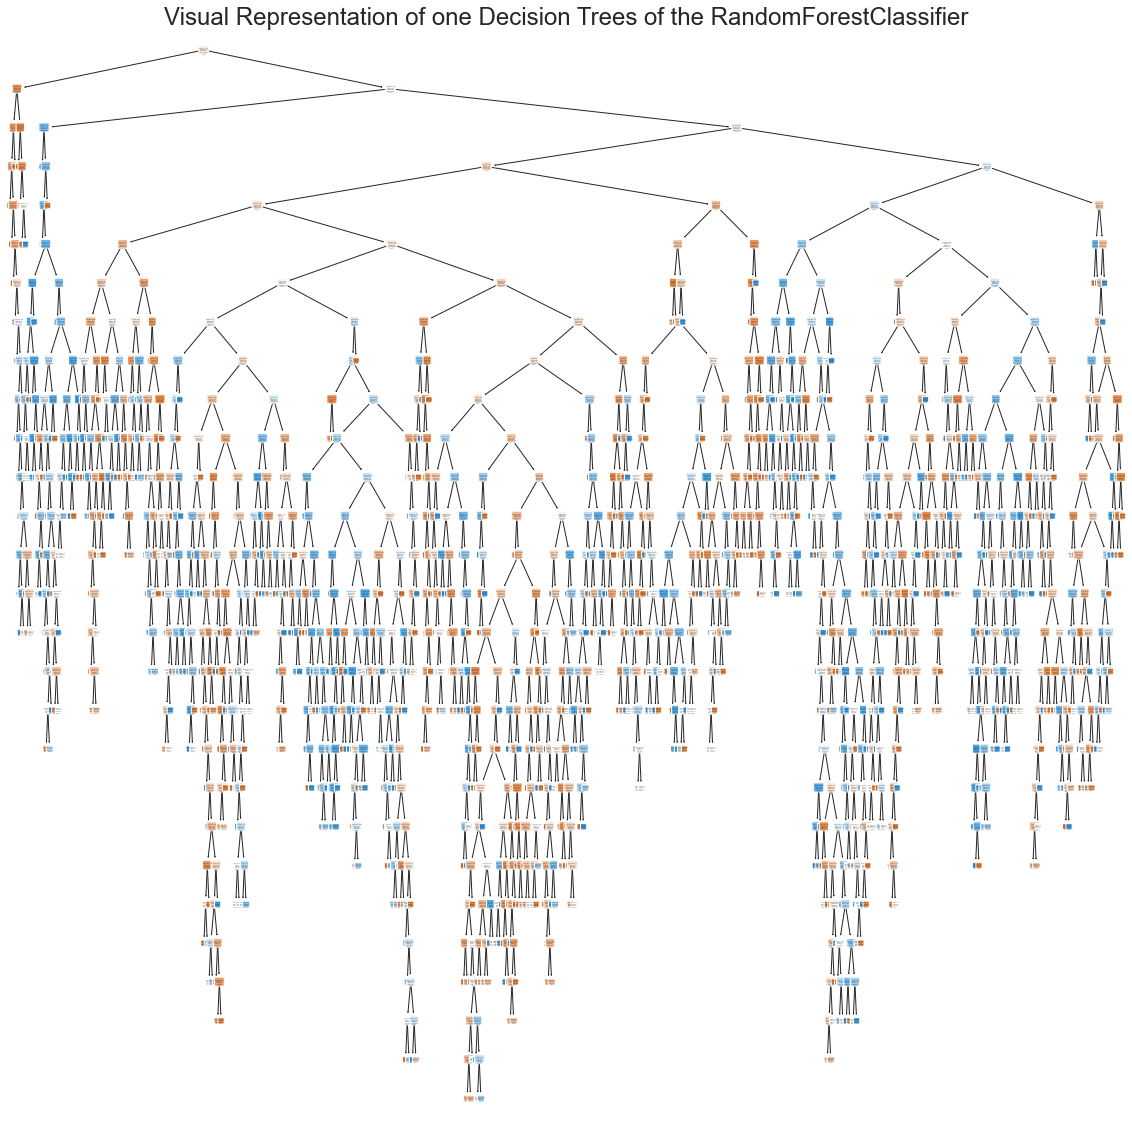

In [ ]:
fig = plt.figure(figsize=(20, 20))

plot_tree(rf.estimators_[0], 
          feature_names=xtrain.columns,
          class_names=["t1", "t2"], 
          filled=True, impurity=True, 
          rounded=True)
plt.title("Visual Representation of one Decision Trees of the RandomForestClassifier", fontsize=24)
plt.show()

<br>
<br>
<br>
<br>
<br>


-----
-----
-----

# **Round Win Differential Regression Models**


-----

## Converting Dataset for The Regression Models 

In [51]:
def convert_dataset_for_reg_models(df : DataFrame, seed : int = 1, test_set_size : float = 0.3):
    
    teams_profiles : dict[str,Series] = make_teams_profiles(df, pstat_vars=SELECTED_PSTAT_VARS)

    # convert all unranked teams to have rank of 31st position
    model_dataset = df.copy()
    model_dataset["t1_rank"].fillna(31, inplace=True)
    model_dataset["t2_rank"].fillna(31, inplace=True)

    # extract data for each team, extract player stats later
    teams_stats = model_dataset.loc[:,["winner","t1_rank", "t2_rank", "t1_name", "t2_name"]]
    # keep_dict = {}
    # print(teams_stats.shape)
    # add team player stat profiles to each entry / row of data in features dataframe
    features_dict = {}
    for index, row in teams_stats.iterrows():
        t1_name, t2_name = row["t1_name"], row["t2_name"]
        if t1_name in teams_profiles or t2_name in teams_profiles:
            if not t1_name in teams_profiles:
                t2_profile = Series(list(teams_profiles[t2_name].values), 
                    index = [f"t2{pstat_var}" for pstat_var in list(teams_profiles[t2_name].index)])
                t1_profile = Series(list(teams_profiles[t2_name].apply(lambda x: None).values), 
                    index = [f"t1{pstat_var}" for pstat_var in list(teams_profiles[t2_name].index)])
            elif not t2_name in teams_profiles:
                t1_profile = Series(list(teams_profiles[t1_name].values), 
                    index = [f"t1{pstat_var}" for pstat_var in list(teams_profiles[t1_name].index)])
                t2_profile = Series(list(teams_profiles[t1_name].apply(lambda x: None).values), 
                    index = [f"t2{pstat_var}" for pstat_var in list(teams_profiles[t1_name].index)])
            else:
                t1_profile = Series(list(teams_profiles[t1_name].values), 
                    index = [f"t1{pstat_var}" for pstat_var in list(teams_profiles[t1_name].index)])
                t2_profile = Series(list(teams_profiles[t2_name].values), 
                    index = [f"t2{pstat_var}" for pstat_var in list(teams_profiles[t2_name].index)])
            features_dict[index] = pd.concat([row, t1_profile, t2_profile])
    
    features = DataFrame.from_dict(features_dict, orient="index")
    features.drop(columns=["t1_name", "t2_name"], inplace=True)
    features["winner"] = features["winner"].apply(lambda x: x == "t1")
    features.fillna(0,inplace=True)
    numerical_vars = list(features.columns)
    labels = model_dataset["rw_diff"].astype("int64")


    xtrain, xtest, ytrain, ytest =  train_test_split( features, labels, random_state=seed, test_size=test_set_size)
    scaler = StandardScaler()
    scaler.fit(xtrain[numerical_vars])
    xtrain[numerical_vars] = scaler.transform(xtrain[numerical_vars]) #scale the training data
    xtest[numerical_vars] = scaler.transform(xtest[numerical_vars]) #scale the testing data

    return xtrain, xtest, ytrain, ytest

# xtrain, xtest, ytrain, ytest = convert_dataset_for_reg_models(recent_matches_dataset ,seed=69)
# xtrain.head()


-----

## Initial Test of the Regression Models 

In [52]:
def initial_test_rw_diff_models():
    xtrain, xtest, ytrain, ytest = convert_dataset_for_reg_models(dataset_partitions.iloc[1] ,seed=69)
    # print(list(xtrain.columns))

    knn = KNeighborsRegressor(n_neighbors=15)
    knn.fit(xtrain,ytrain)
    knn_ypred = knn.predict(xtest)
    print(list(knn_ypred)[:10])
    print(list(ytest)[:10])
    print(f'The KNeighborsRegressor has a RMSE of {round(mean_squared_error(ytest, knn_ypred, squared=False),2)}')
    print(f'The KNeighborsRegressor has a MAE of {round(mean_absolute_error(ytest, knn_ypred),2)}')


    dtc = DecisionTreeRegressor(random_state=69)
    dtc.fit(xtrain, ytrain)
    dtc_ypred = dtc.predict(xtest)
    print(f'The DecisionTreeRegressor has a RMSE of {round(mean_squared_error(ytest, dtc_ypred, squared=False),2)}')
    print(f'The DecisionTreeRegressor has a MAE of {round(mean_absolute_error(ytest, dtc_ypred),2)}')


    rf = RandomForestRegressor(criterion='squared_error', n_estimators = 100, random_state = 69)
    rf.fit(xtrain, ytrain)
    rf_ypred   = rf.predict(xtest)
    print(f'The RandomForestRegressor has a RMSE of {round(mean_squared_error(ytest, rf_ypred, squared=False),2)}')
    print(f'The RandomForestRegressor has a MAE of {round(mean_absolute_error(ytest, rf_ypred),2)}')

    svm = SVR()
    svm.fit(xtrain, ytrain)
    svm_ypred = svm.predict(xtest)
    print(f'The SVR has a RMSE of {round(mean_squared_error(ytest, svm_ypred, squared=False),2)}')
    print(f'The SVR has a MAE of {round(mean_absolute_error(ytest, svm_ypred),2)}')

# initial_test_rw_diff_models()

-----

## Get Available Hyper-Parameters of the Regressors 

In [53]:
dummy_knn = KNeighborsRegressor()
print("Available params for knn():")
print(", ".join([f"{key}: {dummy_knn.get_params()[key]}" for key in dummy_knn.get_params()]))

dummy_dtc = DecisionTreeRegressor()
print("\nAvailable params for dtc():")
print(", ".join([f"{key}: {dummy_dtc.get_params()[key]}" for key in dummy_dtc.get_params()]))

dummy_rf = RandomForestRegressor()
print("\nAvailable params for rf():")
print(", ".join([f"{key}: {dummy_rf.get_params()[key]}" for key in dummy_rf.get_params()]))

dummy_svm = SVR()
print("\nAvailable params for svr():")
print(", ".join([f"{key}: {dummy_svm.get_params()[key]}" for key in dummy_svm.get_params()]))


Available params for knn():
algorithm: auto, leaf_size: 30, metric: minkowski, metric_params: None, n_jobs: None, n_neighbors: 5, p: 2, weights: uniform

Available params for dtc():
ccp_alpha: 0.0, criterion: squared_error, max_depth: None, max_features: None, max_leaf_nodes: None, min_impurity_decrease: 0.0, min_samples_leaf: 1, min_samples_split: 2, min_weight_fraction_leaf: 0.0, random_state: None, splitter: best

Available params for rf():
bootstrap: True, ccp_alpha: 0.0, criterion: squared_error, max_depth: None, max_features: auto, max_leaf_nodes: None, max_samples: None, min_impurity_decrease: 0.0, min_samples_leaf: 1, min_samples_split: 2, min_weight_fraction_leaf: 0.0, n_estimators: 100, n_jobs: None, oob_score: False, random_state: None, verbose: 0, warm_start: False

Available params for svr():
C: 1.0, cache_size: 200, coef0: 0.0, degree: 3, epsilon: 0.1, gamma: scale, kernel: rbf, max_iter: -1, shrinking: True, tol: 0.001, verbose: False


-----

## Performing Hyper-Parameter Tuning

In [54]:
def tune_rw_diff_models():
    knn_reg_tuning_results = {}
    dtr_reg_tuning_results =  {}
    rf_reg_tuning_results = {}
    svm_reg_tuning_results = {}

    for daterange, part in dataset_partitions.iteritems():
        print(daterange)
        random_states = [n + n**n for n in range(0,5)]
        xtrain, xtest, ytrain, ytest = convert_dataset_for_reg_models(df=part, seed=1)

        knn_params = {
            "n_neighbors": [1] + [n for n in range(10,101,10)],
        }
        knn = KNeighborsRegressor()        
        knn_grid = GridSearchCV(estimator = knn, param_grid = knn_params, cv=5, return_train_score = True, scoring='neg_mean_absolute_error')
        knn_grid.fit(xtrain, ytrain)    
        knn_reg_tuning_results[daterange] = dict(knn_grid.best_params_) 
        # take absolute value bc cvgridsearch uses negative values for optimization
        knn_reg_tuning_results[daterange]["score"] = abs(knn_grid.best_score_)
        
        print("knn: ", ", ".join([f"{key} : {knn_grid.best_params_[key]}" for key in knn_grid.best_params_]))


        dtc_params = {
            "random_state" : random_states,
        }
        dtc = DecisionTreeRegressor()
        dtc_grid = GridSearchCV(estimator = dtc, param_grid = dtc_params, cv=5, return_train_score = True, scoring='neg_mean_absolute_error')
        dtc_grid.fit(xtrain, ytrain)    
        dtr_reg_tuning_results[daterange] = dict(dtc_grid.best_params_) 
        # take absolute value bc cvgridsearch uses negative values for optimization
        dtr_reg_tuning_results[daterange]["score"] = abs(dtc_grid.best_score_)

        print("dtr: ", ", ".join([f"{key} : {dtc_grid.best_params_[key]}" for key in dtc_grid.best_params_]))

        rf_params = {
            "n_estimators": [n for n in range(20,201,20)],
            "random_state" : random_states,
        }
        rf = RandomForestRegressor()
        rf_grid = GridSearchCV(estimator = rf, param_grid = rf_params, cv=5, return_train_score = True, scoring='neg_mean_absolute_error')
        rf_grid.fit(xtrain, ytrain)    
        rf_reg_tuning_results[daterange] = dict(rf_grid.best_params_) 
        # take absolute value bc cvgridsearch uses negative values for optimization
        rf_reg_tuning_results[daterange]["score"] = abs(rf_grid.best_score_)

        print("rf: ", ", ".join([f"{key} : {rf_grid.best_params_[key]}" for key in rf_grid.best_params_]))
            
        svm_params = {
            'C': np.arange(8, 12) * 0.1,
            'gamma': [.1],
        }
        svm = SVR()
        svm_grid = GridSearchCV(estimator = svm, param_grid = svm_params, cv=5, return_train_score = True, scoring='neg_mean_absolute_error')
        svm_grid.fit(xtrain, ytrain)    
        svm_reg_tuning_results[daterange] = dict(svm_grid.best_params_) 
        # take absolute value bc cvgridsearch uses negative values for optimization
        svm_reg_tuning_results[daterange]["score"] = abs(svm_grid.best_score_)  
        print("svm: ", ", ".join([f"{key} : {svm_grid.best_params_[key]}" for key in svm_grid.best_params_]))

        # STORE RESULTS AFTER EACH PARTITION
        DataFrame.from_dict(knn_reg_tuning_results, orient="index").to_pickle("cache_knn_reg_tuning_results.pkl")
        DataFrame.from_dict(dtr_reg_tuning_results, orient="index").to_pickle("cache_dtr_reg_tuning_results.pkl")
        DataFrame.from_dict(rf_reg_tuning_results, orient="index").to_pickle("cache_rf_reg_tuning_results.pkl")
        DataFrame.from_dict(svm_reg_tuning_results, orient="index").to_pickle("cache_svm_reg_tuning_results.pkl")


    return knn_reg_tuning_results, dtr_reg_tuning_results, rf_reg_tuning_results, svm_reg_tuning_results
# tune_rw_diff_models()

-----

## Displaying Best Parameter Values From Hyper-Parameter Tuning

In [55]:
knn_reg_tuning_results_df = pd.read_pickle("cache_knn_reg_tuning_results.pkl")
dtr_reg_tuning_results_df = pd.read_pickle("cache_dtr_reg_tuning_results.pkl")
rf_reg_tuning_results_df = pd.read_pickle("cache_rf_reg_tuning_results.pkl")
svm_reg_tuning_results_df = pd.read_pickle("cache_svm_reg_tuning_results.pkl")

print("KNN Regression Tuning Results:")
print(knn_reg_tuning_results_df.head(3))
print("\nDTR Regression Tuning Results:")
print(dtr_reg_tuning_results_df.head(3))
print("\nRF Regression Tuning Results:")
print(rf_reg_tuning_results_df.head(3))
print("\nSVM Regression Tuning Results:")
print(svm_reg_tuning_results_df.head(3))

KNN Regression Tuning Results:
                          n_neighbors     score
2021-10-28 -> 2022-04-26           30  3.140531
2021-05-01 -> 2021-10-28           30  3.203819
2020-11-02 -> 2021-05-01           40  3.210087

DTR Regression Tuning Results:
                          random_state     score
2021-10-28 -> 2022-04-26             1  3.581666
2021-05-01 -> 2021-10-28             1  3.655842
2020-11-02 -> 2021-05-01             2  3.588441

RF Regression Tuning Results:
                          n_estimators  random_state     score
2021-10-28 -> 2022-04-26           160             6  2.934809
2021-05-01 -> 2021-10-28           180             1  2.993379
2020-11-02 -> 2021-05-01           120             2  2.918690

SVM Regression Tuning Results:
                            C  gamma     score
2021-10-28 -> 2022-04-26  1.1    0.1  3.489168
2021-05-01 -> 2021-10-28  1.1    0.1  3.451809
2020-11-02 -> 2021-05-01  1.1    0.1  3.467474


-----

## Testing Performance of Regression Models After Hyper-Parameter Tuning 

In [56]:
reg_models_best_results = pd.DataFrame(knn_reg_tuning_results_df["score"].rename("knn_score"))
reg_models_best_results["dtr_score"] = dtr_reg_tuning_results_df["score"]
reg_models_best_results["rf_score"] = rf_reg_tuning_results_df["score"]
reg_models_best_results["svm_score"] = svm_reg_tuning_results_df["score"]
print(reg_models_best_results,"\n\n")

reg_models_best_results_stats = pd.DataFrame(knn_reg_tuning_results_df["score"].rename("knn_score").describe())
reg_models_best_results_stats["dtr_score"] = dtr_reg_tuning_results_df["score"].describe()
reg_models_best_results_stats["rf_score"] = rf_reg_tuning_results_df["score"].describe()
reg_models_best_results_stats["svm_score"] = svm_reg_tuning_results_df["score"].describe()
print(reg_models_best_results_stats)

def test_regression_models_after_tuning() -> DataFrame:
    # initialize the Dataframe so we can fill it in
    results = DataFrame(
        columns=["knn", "dtr", "rf", "svm"],
        index=dataset_partitions.index)

    for part_daterange, part in dataset_partitions.iteritems():
        xtrain, xtest, ytrain, ytest = convert_dataset_for_reg_models(df=part, seed=1)
   
        knn = KNeighborsClassifier(n_neighbors=int(knn_reg_tuning_results_df.iloc[0]["n_neighbors"]))
        knn.fit(xtrain,ytrain)
        knn_ypred = knn.predict(xtest)
        results.loc[part_daterange]["knn"] = mean_absolute_error(ytest, knn_ypred)

        dtr = DecisionTreeRegressor(random_state=int(dtr_reg_tuning_results_df.iloc[0]["random_state"]))
        dtr.fit(xtrain, ytrain)
        dtr_ypred = dtr.predict(xtest)
        results.loc[part_daterange]["dtr"] = mean_absolute_error(ytest, dtr_ypred)

        rf = RandomForestClassifier(criterion='entropy', 
            n_estimators = int(rf_reg_tuning_results_df.iloc[0]["n_estimators"]), 
            random_state = int(rf_reg_tuning_results_df.iloc[0]["random_state"]))
        rf.fit(xtrain, ytrain)
        rf_ypred = rf.predict(xtest)
        results.loc[part_daterange]["rf"] = mean_absolute_error(ytest, rf_ypred)

        svm = SVR(
            C=svm_reg_tuning_results_df.iloc[0]["C"], 
            gamma=svm_reg_tuning_results_df.iloc[0]["gamma"])
        svm.fit(xtrain, ytrain)
        svm_ypred = svm.predict(xtest)
        results.loc[part_daterange]["svm"] = mean_absolute_error(ytest, svm_ypred)

        print(results.loc[part_daterange])
    return results.astype("float64")

regression_models_results = test_regression_models_after_tuning()
regression_models_results

                          knn_score  dtr_score  rf_score  svm_score
2021-10-28 -> 2022-04-26   3.140531   3.581666  2.934809   3.489168
2021-05-01 -> 2021-10-28   3.203819   3.655842  2.993379   3.451809
2020-11-02 -> 2021-05-01   3.210087   3.588441  2.918690   3.467474
2020-05-06 -> 2020-11-02   3.332526   3.627666  3.017105   3.515151
2019-11-08 -> 2020-05-06   3.167512   3.600732  2.961017   3.512185
2019-05-12 -> 2019-11-08   3.179703   3.668883  3.008156   3.577697
2018-11-13 -> 2019-05-12   3.318372   3.856485  3.166165   3.691381
2018-05-17 -> 2018-11-13   3.292896   3.876096  3.138574   3.737592
2017-11-18 -> 2018-05-17   3.263294   3.860816  3.109850   3.723272 


       knn_score  dtr_score  rf_score  svm_score
count   9.000000   9.000000  9.000000   9.000000
mean    3.234304   3.701847  3.027527   3.573970
std     0.069588   0.125390  0.090031   0.113796
min     3.140531   3.581666  2.918690   3.451809
25%     3.179703   3.600732  2.961017   3.489168
50%     3.210087   3.65

,knn,dtr,rf,svm
2021-10-28 -> 2022-04-26,3.639233,3.515934,3.620050,3.453149
2021-05-01 -> 2021-10-28,3.707046,3.577510,3.774131,3.386970
2020-11-02 -> 2021-05-01,3.642301,3.564520,3.859796,3.517081
2020-05-06 -> 2020-11-02,3.903589,3.592637,3.877343,3.448340
2019-11-08 -> 2020-05-06,3.426177,3.595637,3.696970,3.478336
2019-05-12 -> 2019-11-08,3.535638,3.631507,3.691489,3.387922
2018-11-13 -> 2019-05-12,3.880844,3.888084,4.011973,3.663858
2018-05-17 -> 2018-11-13,3.848141,3.748395,3.933364,3.721495
2017-11-18 -> 2018-05-17,3.900200,3.885853,4.063373,3.695882


----- 

## Visualizing Performance of Regression Models  

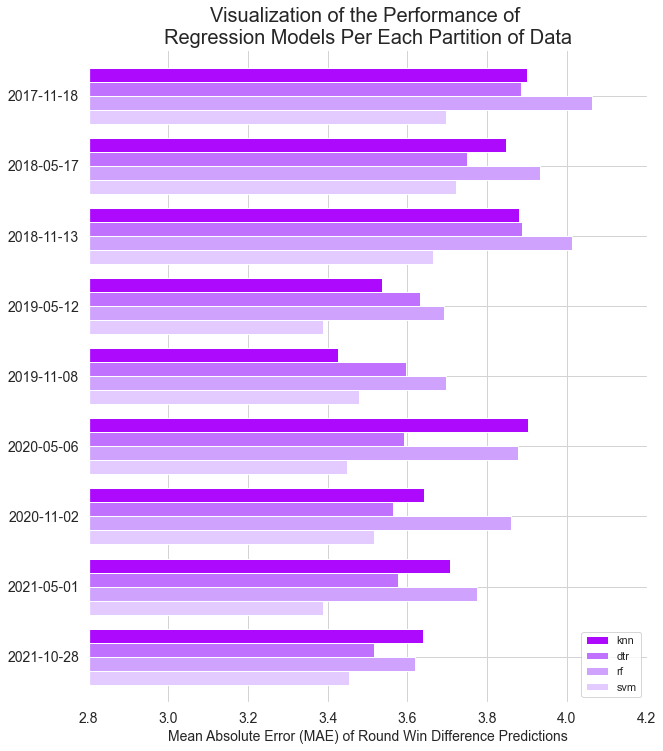

In [134]:

plt.rcParams['axes.facecolor'] = 'white'

temp_df = regression_models_results.copy().loc[:, "knn":].iloc[:, ::-1]
temp_df.index = [label.split(" -> ")[0] for label in classification_models_results.index]

color_list1 = [color("blue violet"), color("bright violet"), color("easter purple"), color("lilac"), color("pale lilac")]
color_list2 = color_list1
color_list2.reverse()
temp_df.plot(kind="barh",figsize=(10,12), xlim=(2.8,4.2), width=.8, legend='reverse',color=color_list2, fontsize=14)

plt.title("Visualization of the Performance of \nRegression Models Per Each Partition of Data", fontsize=20)
plt.xlabel("Mean Absolute Error (MAE) of Round Win Difference Predictions", fontsize=14)

plt.grid(c="lightgray")
plt.show()

-----

## Comparison of Average Perfomance of Regresion M.L. Models 

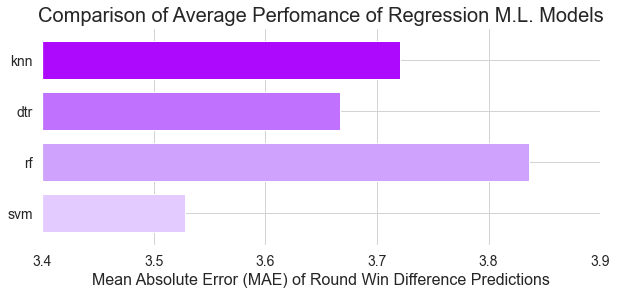

In [76]:
# regression_models_results.iloc[:, ::-1].describe()

regression_models_results.iloc[:, ::-1].describe().loc["mean"].plot(kind="barh", figsize=(10,4), xlim=(3.4,3.9), width=.75, color=color_list2, fontsize=14)
plt.title('Comparison of Average Perfomance of Regression M.L. Models',fontsize=20)
plt.grid(c="lightgray")
plt.xlabel("Mean Absolute Error (MAE) of Round Win Difference Predictions", fontsize=16)

plt.show()

-----

## Prep for Regression Decision Tree Visualization

In [101]:
xtrain, xtest, ytrain, ytest = convert_dataset_for_reg_models(df=recent_matches_dataset, seed=1)

print(dtr_reg_tuning_results_df["random_state"].iloc[0])
dtr = DecisionTreeRegressor(random_state=dtr_reg_tuning_results_df["random_state"].iloc[0])
dtr.fit(xtrain, ytrain)

print(rf_reg_tuning_results_df["n_estimators"].iloc[0], rf_reg_tuning_results_df["random_state"].iloc[0])
rfr = RandomForestRegressor(criterion='squared_error', 
    n_estimators = rf_reg_tuning_results_df["n_estimators"].iloc[0], 
    random_state = rf_reg_tuning_results_df["random_state"].iloc[0])
rfr.fit(xtrain, ytrain)

1
160 6


RandomForestRegressor(n_estimators=160, random_state=6)

-----

## Graph of Feature Importances of Decision Tree Regressor 

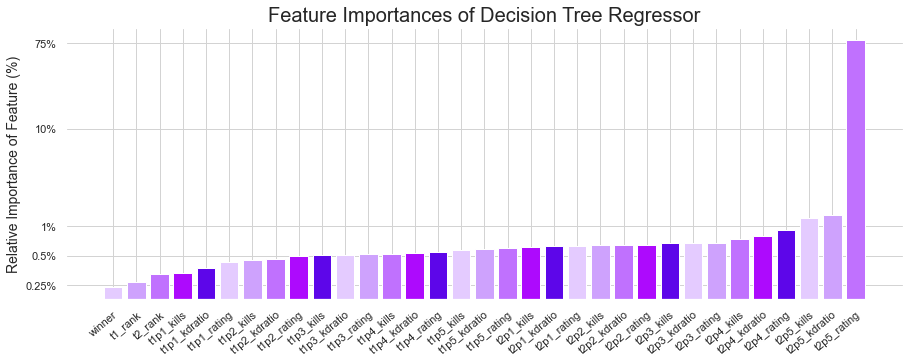

In [129]:
fig = plt.figure(figsize=(15, 5))
dtr_sorted_feat = dtr.feature_importances_.argsort()
plt.bar(xtrain.columns,dtr.feature_importances_[dtr_sorted_feat], color = color_list1)
plt.xticks(rotation=40, ha='right', rotation_mode='anchor')
plt.yscale("log")
plt.yticks(ticks=[0.0025, 0.005, 0.01, 0.1, 0.75],labels=["0.25%","0.5%","1%", "10%", "75%"])
plt.title("Feature Importances of Decision Tree Regressor", fontsize=20)
plt.ylabel("Relative Importance of Feature (%)",fontsize=14)
# plt.ylabel()
plt.grid(c="lightgrey")
plt.show()

-----

## Graph of Feature Importances of Random Forest Regressor 

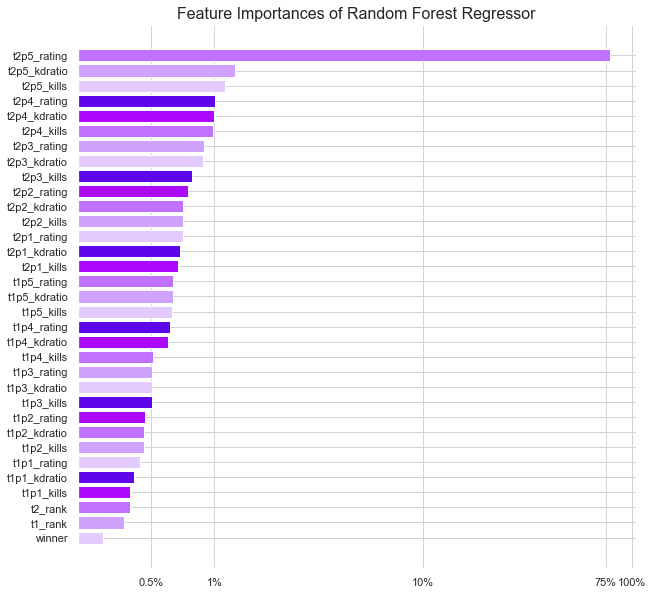

In [61]:
fig = plt.figure(figsize=(10, 10))
rfr_sorted_feat = rfr.estimators_[0].feature_importances_.argsort()
plt.barh(xtrain.columns,rfr.estimators_[0].feature_importances_[rfr_sorted_feat], color=color_list1)
plt.xscale("log")
plt.xticks(ticks=[0.005, 0.01, 0.1, 0.75, 1.0],labels=["0.5%","1%", "10%", "75%", "100%"])
plt.title("Feature Importances of Random Forest Regressor", fontsize=16)
# plt.xlabel()
# plt.ylabel()
plt.grid(c="lightgrey")
plt.show()

-----

## Visualization of a Decision Tree Regressor

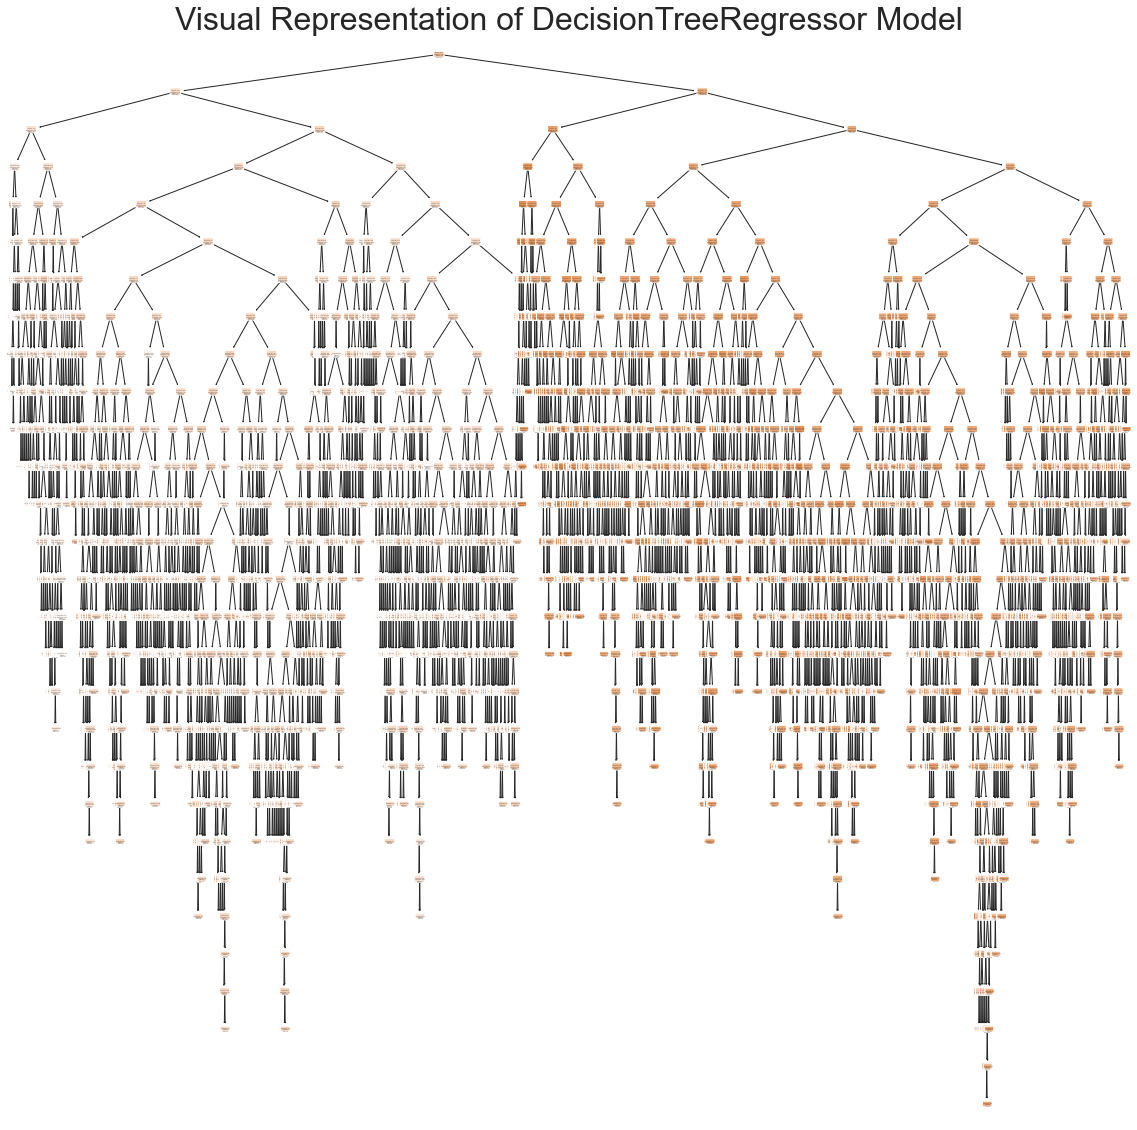

In [62]:
fig = plt.figure(figsize=(20, 20))

plot_tree(dtr, 
          feature_names=xtrain.columns,
          class_names=["t1", "t2"], 
          filled=True, impurity=True, #max_depth=5,
          rounded=True)
plt.title("Visual Representation of DecisionTreeRegressor Model",fontsize=32)
plt.show()

-----

## Visualization of a Random Forest Regressor

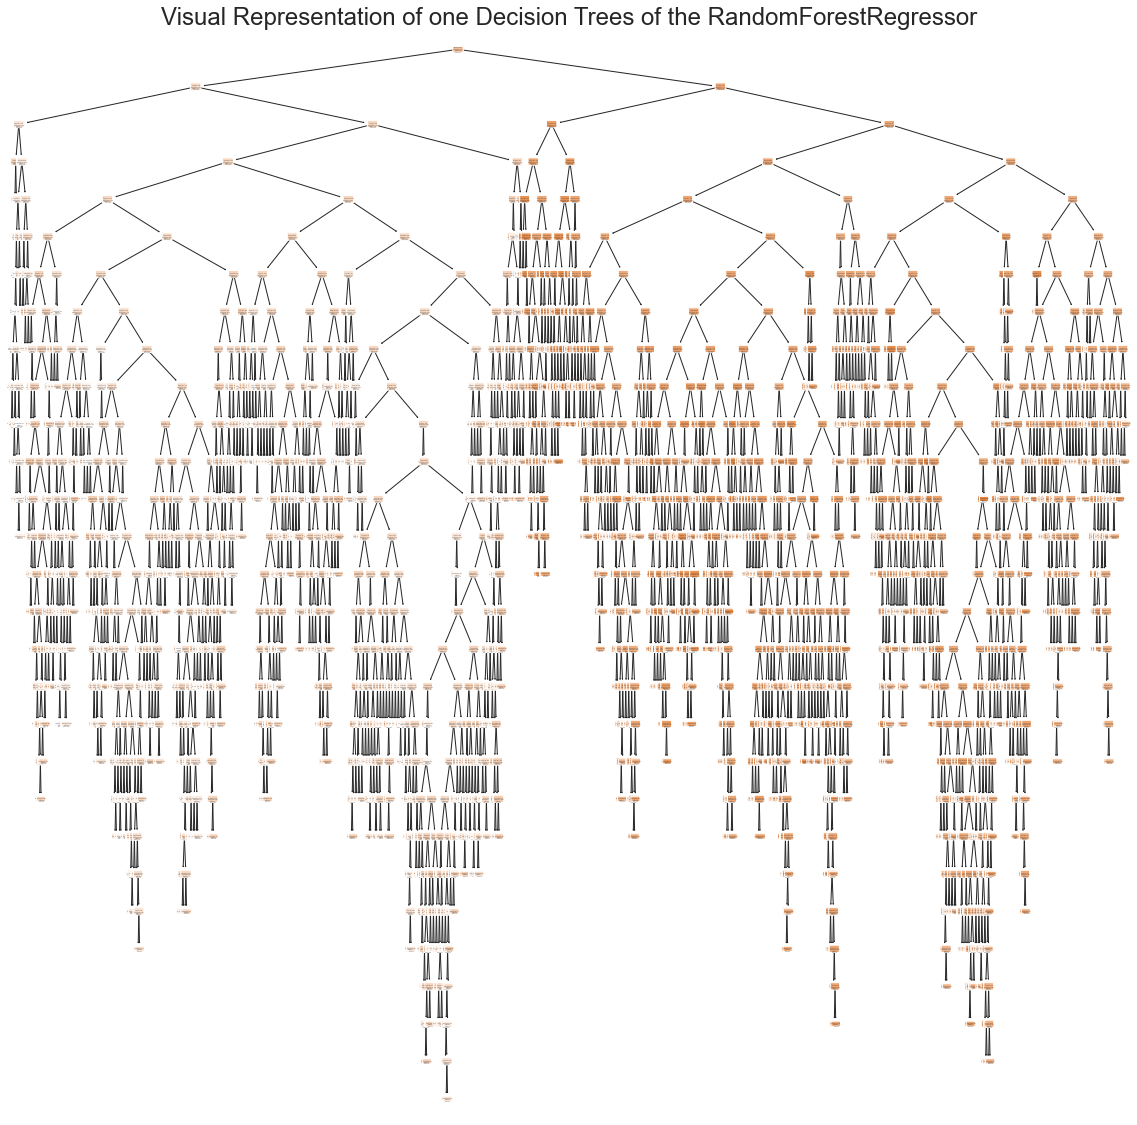

In [63]:
fig = plt.figure(figsize=(20, 20))

plot_tree(rfr.estimators_[0], 
          feature_names=xtrain.columns,
          class_names=["t1", "t2"], 
          filled=True, impurity=True, 
          rounded=True)
plt.title("Visual Representation of one Decision Trees of the RandomForestRegressor", fontsize=24)
plt.show()

<br>
<br>
<br>
<br>
<br>

-----
-----
-----
# **Python Web Scrapers**

**NOTE**: *This is in markdown because this is not meant to be run / executed. These scrapers take days to run fully and
the results of doing so are already stored in the csv files* 

<br>

----- 

## HLTV Matches URL Scraper:

**crawler.py:**

-----

```python
import requests
from bs4 import BeautifulSoup
from alive_progress import alive_bar, alive_it
import os
import csv 
import time

os.chdir(os.path.dirname(os.path.realpath(__file__)))

matches_urls = {}
num_matches_loaded = 0

def load_matches_urls_csv():
    global matches_urls, num_matches_loaded
    # load previously stored matches urls
    with open("all_matches_urls.csv", "r") as f:
        matches_urls = {l.split(",")[0].strip():l.split(",")[1].strip() for l in f.readlines()[1:]}
    num_matches_loaded = len(matches_urls)


def format_hltv_date(hltv_date : str):
    day, month, year = hltv_date.split("/")
    return "-".join((f"20{year}", month.rjust(2,'0'), day.rjust(2,'0')))

def save_matches_urls_csv():
    with open("all_matches_urls.csv", "w") as f:
        f.write("match_url,match_date\n")
        for url in matches_urls:
            f.write(f"{url},{matches_urls[url]}\n")
    
def get_matches_urls(matches_page_html_text : str):
    global matches_urls
    match_list = []
    while True:
        soup = BeautifulSoup(matches_page_html_text, "html.parser")
        match_list=soup.select("tr.group-1") + soup.select("tr.group-2")    
        if len(match_list) == 50:
            break
        time.sleep(1)
    # before = len(matches_urls)
    for entry in match_list:
        match_url = entry.select("td.date-col")[0].select("a")[0]["href"]
        match_date = format_hltv_date(entry.select("td.date-col")[0].select("a")[0].select("div.time")[0].text)
        matches_urls[match_url] = match_date
        
def get_matches_page_html(offset : int = 0) -> str:
    # round down to interval of 50
    url=f"https://www.hltv.org/stats/matches?offset={offset}"
    response = requests.get(url)
    return response.text

def crawl(num_matches, starting_offset):
    for query_offset in alive_it(range(0, num_matches, 50)):
        if query_offset >= starting_offset:
            html = get_matches_page_html(offset=query_offset)
            get_matches_urls(html)
            save_matches_urls_csv()
            with open("crawler_last_page_no.txt","w") as f:
                f.write(str(int(query_offset/50)))

load_matches_urls_csv()

# num_match_urls_to_get = input("How many total match urls do you want to fetch? ")
# last_page_no = input("What page number did you get to last? ") 
# last_page_no = 0 if last_page_no == "" else int(last_page_no) 

num_match_urls_to_get = 80000
with open("crawler_last_page_no.txt","r") as f:
    last_page_no = int(f.read())

# last_page_no = 0
num_match_urls_to_get = 0

if num_match_urls_to_get and (num_match_urls_to_get:=int(num_match_urls_to_get)) > 0:
    crawl(num_match_urls_to_get, last_page_no*50)
    print(f"number of matches_urls: {num_matches_loaded} -> {len(matches_urls)}")
    save_matches_urls_csv()

```

-----

## HLTV Team Rankings Scraper

**team_rankings_scraper.py:**

-----

```python
import requests
from bs4 import BeautifulSoup
from alive_progress import alive_bar, alive_it
import os
import csv
from datetime import datetime, timedelta
import re

os.chdir(os.path.dirname(os.path.realpath(__file__)))

hltv_base_url = "https://www.hltv.org"

def is_valid_page(html : str) -> bool:
    soup = BeautifulSoup(html, "html.parser")
    return len(soup.select("div.regional-ranking-header")) == 1 

scraped_urls = []
scraped_dates = []
team_rankings_each_day = []
num_urls_loaded = 0
nums_days_loaded = 0

team_rankings_csv_fields = ["date","url"]
for n in range(1,31):
    team_rankings_csv_fields += [f"{n}_team_name", f"{n}_team_id", f"{n}_team_ranking_points"]

# print(team_rankings_csv_fields)

def load_csv():
    global scraped_urls, scraped_dates, num_urls_loaded, nums_days_loaded
    
    # with open("team_rankings_urls.csv", "r", encoding="utf-8") as f:
        # scraped_urls = [l.strip() for l in f.readlines()]
    with open("team_rankings.csv", "r", encoding="utf-8") as f:
        if len(list(f.readlines())) <= 2:
            print("EMPTY CSV")
            return
    with open("team_rankings.csv", "r", encoding="utf-8") as f:
        csvreader = csv.reader(f, delimiter=',') 
        header_skipped = False
        for row in csvreader: 
            if not header_skipped:
                row = next(csvreader)
                header_skipped = True
            if len(row) == len(team_rankings_csv_fields):
                team_rankings_each_day.append(row)
                if row[1] not in scraped_urls:
                    scraped_urls.append(row[1])

    nums_days_loaded = len(team_rankings_each_day)
    num_urls_loaded = len(scraped_urls)

def save_csv():
    with open("team_rankings.csv", "w", encoding="utf-8", newline="") as f:
        writer = csv.writer(f, delimiter=',')
        writer.writerow(team_rankings_csv_fields)
        writer.writerows(team_rankings_each_day)

def parse_date_from_url(url : str) -> datetime:
    url_datetime_info = url.split("/")[-3:]
    dt_obj = datetime.strptime(" ".join(url_datetime_info), "%Y %B %d")
    return dt_obj

# stop datetime object is exclusive i.e. will not be included : [start_dt, stop_dt)
def get_datetimes_between_dates(start_dt : datetime, stop_dt : datetime):
    result = []
    if start_dt > stop_dt:
        temp = start_dt
        start_dt = stop_dt
        stop_dt = temp
    while start_dt < stop_dt:
        result.append(start_dt)
        start_dt = start_dt + timedelta(days=1)
    return result

def get_next_week(current_dt: datetime):
    days_off = 7 if (abs((current_dt - datetime(2022,3,7)).days) % 7) == 0 else (abs((current_dt - datetime(2022,3,7)).days) % 7)
    new_dt = current_dt - timedelta(days=days_off)
    week_of_dts = get_datetimes_between_dates(current_dt, new_dt)
    week_url = f"https://www.hltv.org/ranking/teams/{new_dt.strftime('%Y')}/{new_dt.strftime('%B')}/{new_dt.strftime('%d')}".lower()
    return new_dt, week_of_dts, week_url

def get_rank_boxes(html : str):
    soup = BeautifulSoup(html, "html.parser")
    return soup.select("div.ranked-team")

def scrape_team_rankings(url : str) -> list[str]:
    r = requests.get(url)

    if not is_valid_page(html:=r.text):
        if "<h1>404</h1>" in html and '<div class="error-desc">Page not found</div>' in html:
            print("date got messed up somehow...")
            print(url)
            return []
        print("they rate limited my ass D:")
        print(url)
        with open("failed_rankings_page.html", "w", encoding="utf-8") as f:
            f.write(html)
        exit()
    
    boxes = get_rank_boxes(html)
    extracted_info = []
    
    for box in boxes:
        name = box.select("div.lineup-con")[0].select("a.moreLink")[0]["href"].split("/")[3]
        id = box.select("div.lineup-con")[0].select("a.moreLink")[0]["href"].split("/")[2]
        pts = re.sub("[^0-9]", "", box.select("div.teamLine")[0].select("span.points")[0].text)
        extracted_info += [name, id, pts]   
    
    return extracted_info

def scrape_and_crawl_team_rankings():

    weeks_to_scrape = input("How many weeks back of team rankings do you want to scrape? ")
    if weeks_to_scrape and (weeks_to_scrape:=int(weeks_to_scrape)) > 0:
        start_dt = datetime(datetime.now().year, datetime.now().month, datetime.now().day) + timedelta(days=1)
        dt_it = start_dt
        load_csv()
        with alive_bar(weeks_to_scrape, bar="filling", length=30, title="Scraping Matches Pages") as bar:
            for week_n in range(0, weeks_to_scrape):
                dt_it, dt_batch, week_url = get_next_week(dt_it)
                if week_url not in scraped_urls:
                    scraped_urls.append(week_url)
                    ranking_data = []
                    while True:
                        ranking_data = scrape_team_rankings(week_url)

                        if len(ranking_data) == 0:
                            dt_it, dt_batch, week_url = get_next_week(dt_it + timedelta(days=1))
                        else:
                            break

                    
                    for dt in dt_batch:
                        entry = [dt.strftime("%Y-%m-%d"), week_url] + ranking_data
                        # if existing:=[x for x in team_rankings_each_day if x[0] == entry[0]]:
                        #     for item in existing:
                        #         team_rankings_each_day.remove(item)
                        team_rankings_each_day.append(entry)
                    save_csv()
                bar()

        print(f"Days of rankings scraped: {nums_days_loaded} -> {len(team_rankings_each_day)}")

scrape_and_crawl_team_rankings()

```


-----

## HLTV Matches Stats Scraper


**matches_stats_scraper.py:**

-----

```python
from re import S
from urllib import request
import requests
from bs4 import BeautifulSoup
from alive_progress import alive_bar, alive_it
import os
# import time
from crawler import *

os.chdir(os.path.dirname(os.path.realpath(__file__)))
hltv_base_url = "https://www.hltv.org"

match_stats_csv_fields = [
    "match_url", "match_date", "map",

    "t1_name", "t1_id", "t1_total_rw", "t1_fh_rw", "t1_sh_rw", "t1_ot_rw", "t1_rating", "t1_fkills", "t1_cw",

    "t1p1_player", "t1p1_kills", "t1p1_hskills", "t1p1_assists", "t1p1_fassists", "t1p1_deaths", "t1p1_kdratio", 
    "t1p1_kddiff", "t1p1_adr", "t1p1_fkdiff", "t1p1_rating", "t1p2_player", "t1p2_kills", "t1p2_hskills", 
    "t1p2_assists", "t1p2_fassists", "t1p2_deaths", "t1p2_kdratio", "t1p2_kddiff", "t1p2_adr", "t1p2_fkdiff", 
    "t1p2_rating", "t1p3_player", "t1p3_kills", "t1p3_hskills", "t1p3_assists", "t1p3_fassists", "t1p3_deaths", 
    "t1p3_kdratio", "t1p3_kddiff", "t1p3_adr", "t1p3_fkdiff", "t1p3_rating", "t1p4_player", "t1p4_kills", 
    "t1p4_hskills", "t1p4_assists", "t1p4_fassists", "t1p4_deaths", "t1p4_kdratio", "t1p4_kddiff", "t1p4_adr", 
    "t1p4_fkdiff", "t1p4_rating", "t1p5_player", "t1p5_kills", "t1p5_hskills", "t1p5_assists", "t1p5_fassists", 
    "t1p5_deaths", "t1p5_kdratio", "t1p5_kddiff", "t1p5_adr", "t1p5_fkdiff", "t1p5_rating", 

    "t2_name", "t2_id", "t2_total_rw", "t2_fh_rw", "t2_sh_rw", "t2_ot_rw", "t2_rating", "t2_fkills", "t2_cw",
    
    "t2p1_player", "t2p1_kills", "t2p1_hskills", "t2p1_assists", "t2p1_fassists", "t2p1_deaths", "t2p1_kdratio", 
    "t2p1_kddiff", "t2p1_adr", "t2p1_fkdiff", "t2p1_rating", "t2p2_player", "t2p2_kills", "t2p2_hskills", 
    "t2p2_assists", "t2p2_fassists", "t2p2_deaths", "t2p2_kdratio", "t2p2_kddiff", "t2p2_adr", "t2p2_fkdiff", 
    "t2p2_rating", "t2p3_player", "t2p3_kills", "t2p3_hskills", "t2p3_assists", "t2p3_fassists", "t2p3_deaths", 
    "t2p3_kdratio", "t2p3_kddiff", "t2p3_adr", "t2p3_fkdiff", "t2p3_rating", "t2p4_player", "t2p4_kills", 
    "t2p4_hskills", "t2p4_assists", "t2p4_fassists", "t2p4_deaths", "t2p4_kdratio", "t2p4_kddiff", "t2p4_adr", 
    "t2p4_fkdiff", "t2p4_rating", "t2p5_player", "t2p5_kills", "t2p5_hskills", "t2p5_assists", "t2p5_fassists", 
    "t2p5_deaths", "t2p5_kdratio", "t2p5_kddiff", "t2p5_adr", "t2p5_fkdiff", "t2p5_rating"
]

def is_valid_match_page(html : str) -> bool:
    soup = BeautifulSoup(html, "html.parser")
    return len(soup.select("table.stats-table")) == 2

def get_teams_stats_table(html : str):
    soup = BeautifulSoup(html, "html.parser")
    return soup.select("table.stats-table")[0], soup.select("table.stats-table")[1]
    
# returns a list of 5 players stats which are flattened lists of (key, value) pairings (tuples)
def get_player_stats(table):
    result = {}
    players = []

    try:
        result["team_name"] = table.select("thead")[0].select("th.st-teamname")[0].text
        columns = table.select("thead")[0].select("th")[1:]
        rows = table.select("tbody")[0].select("tr")
        for row in rows:
            pstats = {}
            stats = row.select("td")
            for stat in stats:
                stat_name = stat["class"][0][3:]
                stat_value = (stat.text.split(" ")[0]).strip()
                pstats[stat_name] = stat_value

                if stat_name == "kills":
                    # get secondary stat in parenthesis and then trim off the parenthesis to keep just the value
                    pstats["hskills"] =  stat.text.split()[1][1:-1].strip() if "(" in stat.text else ""
                if stat_name == "assists":
                    # get secondary stat in parenthesis and then trim off the parenthesis to keep just the value
                    pstats["fassists"] = stat.text.split()[1][1:-1].strip() if "(" in stat.text else ""
            players.append(pstats)
    except:
        print(table)
    return players

num_match_stats_loaded = 0
completed_matches_urls = []
match_stats = []

last_scraped_match_stats = {}  # for debug purposes only


def load_matches_stats_csv():
    global completed_matches_urls, num_match_stats_loaded, match_stats
    # load previously stored match stats
    with open("all_matches_stats.csv", "r+", encoding="utf-8") as f:
        if len(list(f.readlines())) <= 2:
            print("EMPTY CSV")
            dictwriter = csv.DictWriter(f, fieldnames=match_stats_csv_fields)
            dictwriter.writeheader()
            return
    with open("all_matches_stats.csv", "r", encoding="utf-8") as f:
        csvdictreader = csv.DictReader(f, delimiter=',') 
        for row in csvdictreader: 
            # print(len(row), len(match_stats_csv_fields))
            if len(row) == len(match_stats_csv_fields):
                if "?rankingFilter=Top30" in row["match_url"]:
                    row["match_url"] = row["match_url"].replace("?rankingFilter=Top30","")
                match_stats.append(row)
                if row["match_url"] not in completed_matches_urls:
                    completed_matches_urls.append(row["match_url"])
    num_match_stats_loaded = len(match_stats)
    save_full_csv()

def save_full_csv():
    # try:
    with open("all_matches_stats.csv", "w", encoding="utf-8", newline="") as f:
        dictwriter = csv.DictWriter(f, fieldnames=match_stats_csv_fields)
        dictwriter.writeheader()
        dictwriter.writerows(match_stats)

def append_csv():
    # try:
    with open("all_matches_stats.csv", "a", encoding="utf-8", newline="") as f:
        dictwriter = csv.DictWriter(f, fieldnames=match_stats_csv_fields)
        dictwriter.writerow(last_scraped_match_stats)

def extract_map_team_stats(html : str):
    soup = BeautifulSoup(html, "html.parser")
    team_stats_rows = soup.select("div.match-info-row .right")
    team_stats = {}
    breakdown = team_stats_rows[0].text.replace(")","").replace(" ","").split("(")
    team_stats["total_rw"] = breakdown[0].split(":")  # total round wins
    team_stats["fh_rw"] = breakdown[1].split(":")  # first half round wins
    team_stats["sh_rw"] = breakdown[2].split(":")  # second half round wins
    team_stats["ot_rw"] = ["0","0"] if len(breakdown) != 4 else breakdown[3].split(":")  # overtime round wins
    team_stats["rating"] = team_stats_rows[1].text.replace(" ", "").split(":")  # team rating for the map
    team_stats["fkills"] = team_stats_rows[2].text.replace(" ", "").split(":")  # first kills
    team_stats["cw"] = team_stats_rows[2].text.replace(" ", "").split(":")  # clutches won
    map_name = (txt:=soup.select("div.match-info-box")[0].text.lower())[txt.find("map"):].split()[1]
    t1_stats = {f"t1_{variable}": team_stats[variable][0] for variable in team_stats}
    t2_stats = {f"t2_{variable}": team_stats[variable][1] for variable in team_stats}
    return t1_stats, t2_stats, map_name

def extract_team_names_and_ids(html : str):
    soup = BeautifulSoup(html, "html.parser")
    teams = {}
    teams["t1_name"] = soup.select("div.team-left a")[0]["href"].split("/")[-1].split("?")[0]
    teams["t1_id"] = soup.select("div.team-left a")[0]["href"].split("/")[-2]
    teams["t2_name"] = soup.select("div.team-right a")[0]["href"].split("/")[-1].split("?")[0]
    teams["t2_id"] = soup.select("div.team-right a")[0]["href"].split("/")[-2]
    return teams

def extract_stats(match_url : str, match_date : str):
    stats = {"match_url": match_url, "match_date": match_date}
    # if only given a uri, turn into full url
    if not "http" in match_url:
        match_url = hltv_base_url + match_url
    r = None
    while True:
        r = requests.get(match_url)
        if is_valid_match_page(r.text):
            break
        print("WE GOT RATE LIMITED D:", end="")
        # print(r.text)
        # input()
        time.sleep(120)
        print(" trying again")

    tables = get_teams_stats_table(r.text)
    team1_player_stats, team2_player_stats = get_player_stats(tables[0]) , get_player_stats(tables[1])

    t1_pstats = {}
    for pn in range(1,min(len(team1_player_stats)+1,6)):
        pstats = team1_player_stats[pn-1]
        for variable in pstats:
            t1_pstats[f"t1p{pn}_{variable}"] = pstats[variable]

    t2_pstats = {}
    for pn in range(1,min(len(team2_player_stats)+1,6)):
        pstats = team2_player_stats[pn-1]
        for variable in pstats:
            t2_pstats[f"t2p{pn}_{variable}"] = pstats[variable]

    t1_map_stats, t2_map_stats, map_name = extract_map_team_stats(r.text)   
    teams_info = extract_team_names_and_ids(r.text)

    stats["map"] = map_name
    stats.update(t1_pstats)
    stats.update(t2_pstats)
    stats.update(t1_map_stats)
    stats.update(t2_map_stats)
    stats.update(teams_info)

    return stats

def scrape_matches_pages():
    global last_scraped_match_stats, match_stats, completed_matches_urls, num_matches_stats_scraped
    num_matches_stats_to_scrape = input("How many matches stats do you want to scrape? ")

    if num_matches_stats_to_scrape and (num_matches_stats_to_scrape:=int(num_matches_stats_to_scrape)) > 0:
        load_matches_stats_csv()
        num_matches_stats_scraped = 0
        urls = set(matches_urls.keys())
        with alive_bar(num_matches_stats_to_scrape, bar="filling", length=30, title="Scraping... ") as bar:
            for url in urls:
                if num_matches_stats_scraped >= num_matches_stats_to_scrape:
                    break
                if not url in completed_matches_urls: 
                    if matches_urls[url] > "2017-08-01":
                        match_stats.append(last_scraped_match_stats:=extract_stats(url, matches_urls[url]))
                        completed_matches_urls.append(url)
                        num_matches_stats_scraped += 1
                        append_csv()
                        bar() 

        print(f"number of new/unique matches stats scraped: {num_match_stats_loaded} -> {len(match_stats)}")


scrape_matches_pages()

```
